# Description Background and Context

AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

You as a Data scientist at AllLife bank has to build a model that will help marketing department to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

Objective

To predict whether a liability customer will buy a personal loan or not.

Which variables are most significant.

Which segment of customers should be targeted more.

 

Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Bank?

# Load Libaries

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("Loan_Modelling.csv") # Load data

In [5]:
df = data.copy() # make a copy

In [5]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.shape

(5000, 14)

In [9]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

All data are numerival numbers, no catgory data
No missing data
5000 rows and 12 columns

In [11]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [66]:
df.Age.unique(), df.Experience.unique(), df.Income.unique(), df.ZIPCode.unique(),df.Family.unique(),df.CCAvg.unique(),df.Education.unique(),df.Mortgage.unique(),df.Personal_Loan.unique()

(array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
        55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
        58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64),
 array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
        21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
         3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64),
 array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
        112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
         35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
        194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
         69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
         64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
         98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
        171, 168,  65,  10, 148, 159, 169, 

# EDA
## Univariate

In [30]:
def histogram_boxplot(feature, figsize=(12,8), bins = None):
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

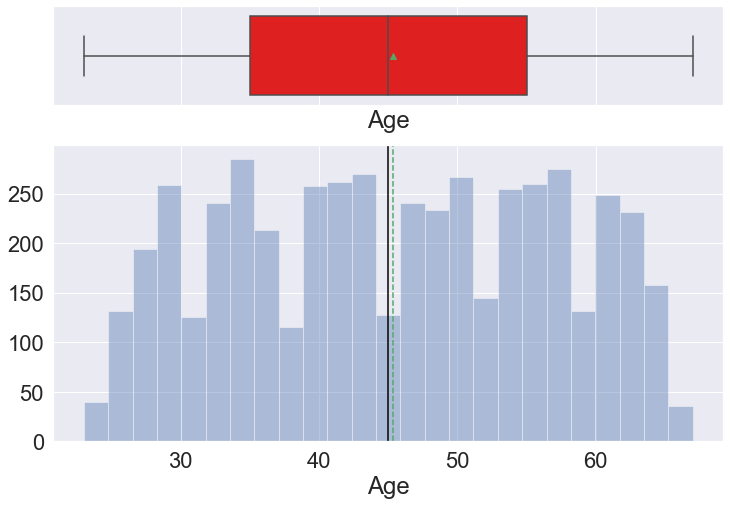

In [37]:
histogram_boxplot(df.Age,bins=25);

### customer ages are uniform distributed, range from 20 to 65

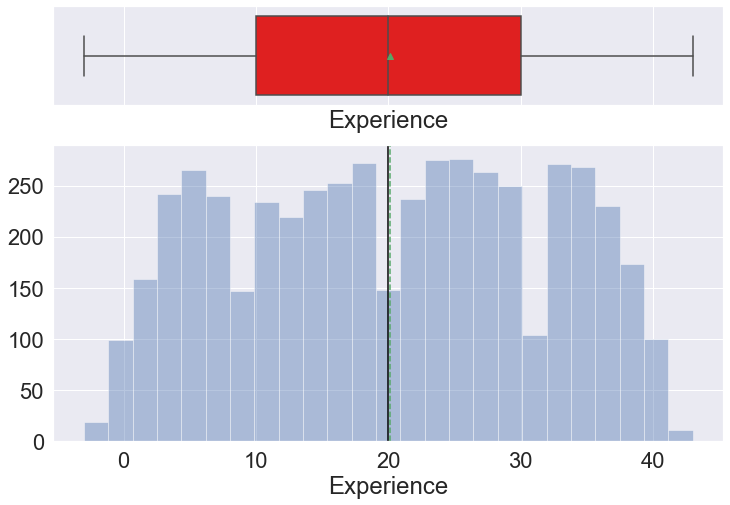

In [41]:
histogram_boxplot(df.Experience, bins = 25)

### customer experience are uniform distributed, range from -3 ro 45, nagtive experience should not exist, we could use logrithm

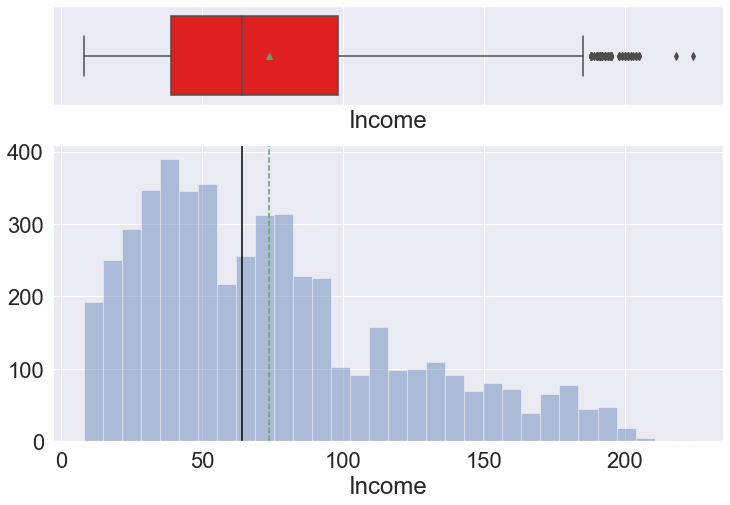

In [42]:
histogram_boxplot(df.Income)

### customer income are left skewed to lower end. Some outliers with very high income

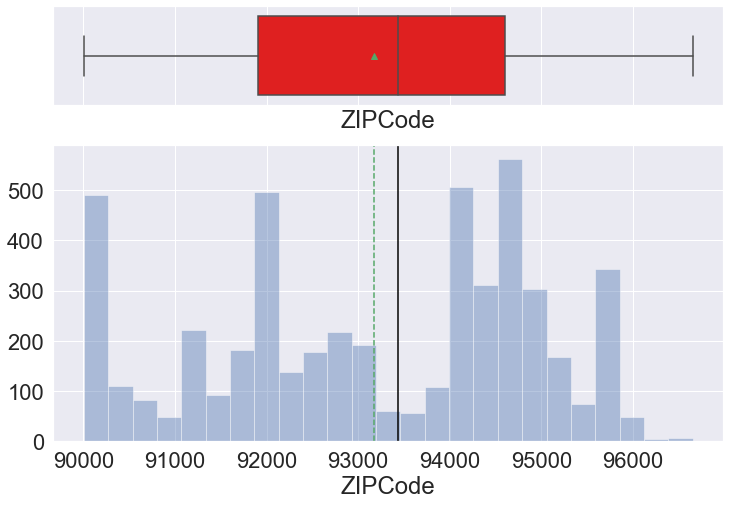

In [54]:
histogram_boxplot(df.ZIPCode,bins=25);

### ZIPCode distribution are random

Family distribution 
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


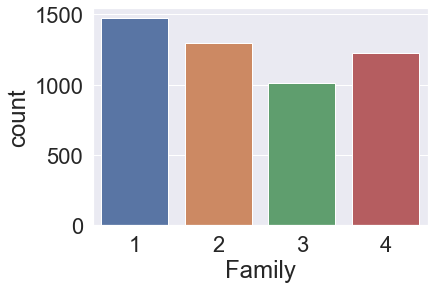

In [63]:
sns.countplot(x=df.Family)
plt.xlabel('Family')
plt.ylabel('count')
print('Family distribution \n',df['Family'].value_counts(normalize= False))

### Family with 1 people has the most customer, then couples, then 4 people and 3 people.

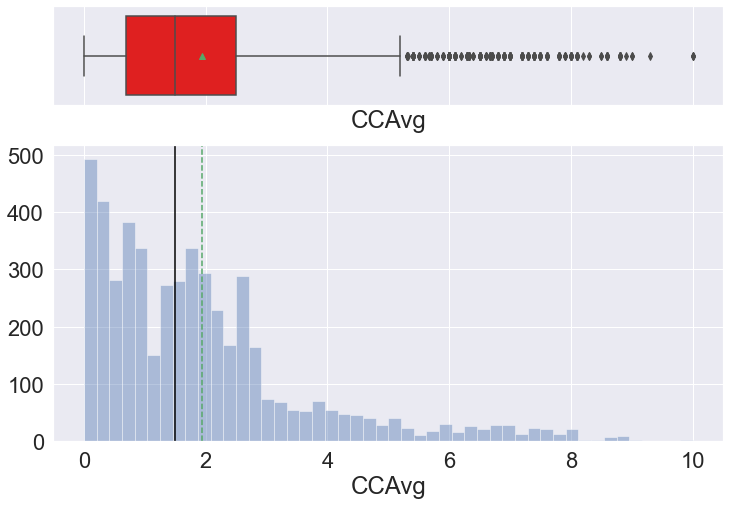

In [56]:
histogram_boxplot(df.CCAvg);

### CCAcg are left skewed with outliers

Education distribution 
 1    2096
3    1501
2    1403
Name: Education, dtype: int64


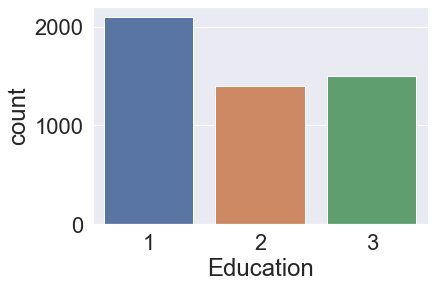

In [62]:
sns.countplot(x=df.Education)
plt.xlabel('Education')
plt.ylabel('count')
print('Education distribution \n',df['Education'].value_counts(normalize= False))

### most customer has education level, level2 and level 3 has same number of customer

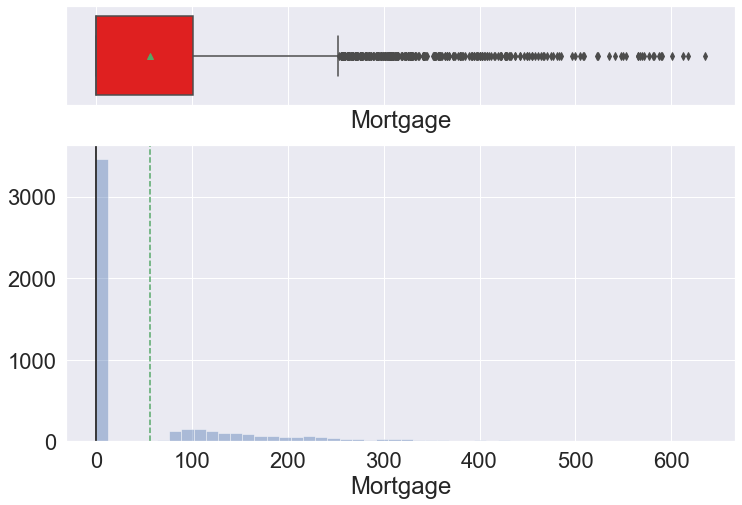

In [115]:
histogram_boxplot(df.Mortgage);

### lots of people have zero mortgage, outliers are significant

In [124]:
# df.Mortgage.isnull().sum()
#sns.distplot(np.log(df.Mortgage));

Personal_loan 
 0    4520
1     480
Name: Personal_Loan, dtype: int64


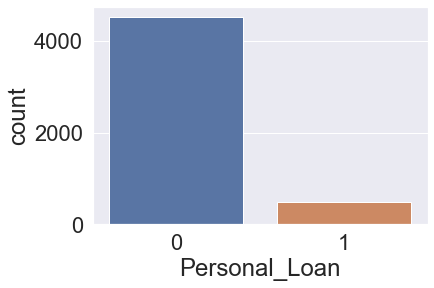

In [67]:
sns.countplot(x=df.Personal_Loan)
plt.xlabel('Personal_Loan')
plt.ylabel('count')
print('Personal_loan \n',df['Personal_Loan'].value_counts(normalize= False))

### majority of customer has no personal_loan with the bank

Securities_Account 
 0    4478
1     522
Name: Securities_Account, dtype: int64


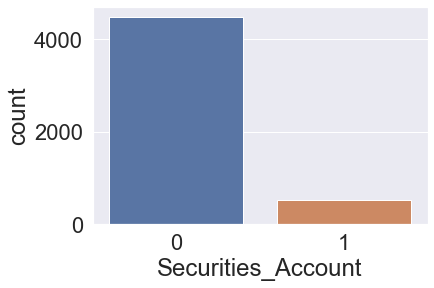

In [69]:
sns.countplot(x=df.Securities_Account)
plt.xlabel("Securities_Account")
plt.ylabel('count')
print('Securities_Account \n',df['Securities_Account'].value_counts(normalize= False))

### majority of people has no securities_acount

CD_Account 
 0    4698
1     302
Name: CD_Account, dtype: int64


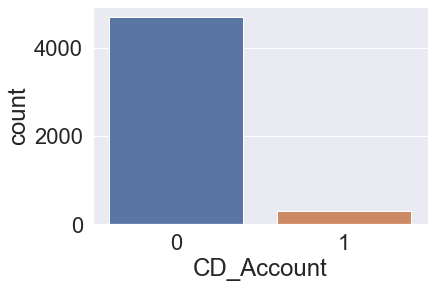

In [72]:
sns.countplot(x=df.CD_Account)
plt.xlabel("CD_Account")
plt.ylabel('count')
print('CD_Account \n',df['CD_Account'].value_counts(normalize= False))

### majority customer has no CD_account

Online 
 1    2984
0    2016
Name: Online, dtype: int64


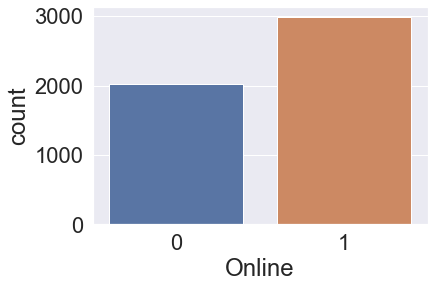

In [73]:
sns.countplot(x=df.Online)
plt.xlabel("Online")
plt.ylabel('count')
print('Online \n',df['Online'].value_counts(normalize= False))

### Majority people has online bank

CreditCard 
 0    3530
1    1470
Name: CreditCard, dtype: int64


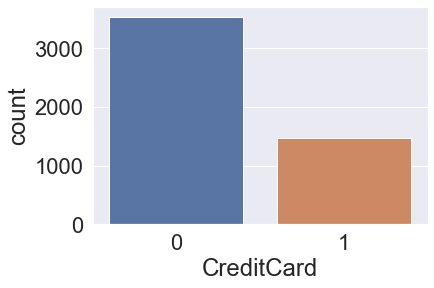

In [74]:
sns.countplot(x=df.CreditCard)
plt.xlabel("CreditCard")
plt.ylabel('count')
print('CreditCard \n',df['CreditCard'].value_counts(normalize= False))

### majority customer has no credit card with the bank

## Bivariate analysis
### Personal_loan & Age

Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49              105   10   115
50              125   13   138
51              119   10   129
52              130   15   145
53      

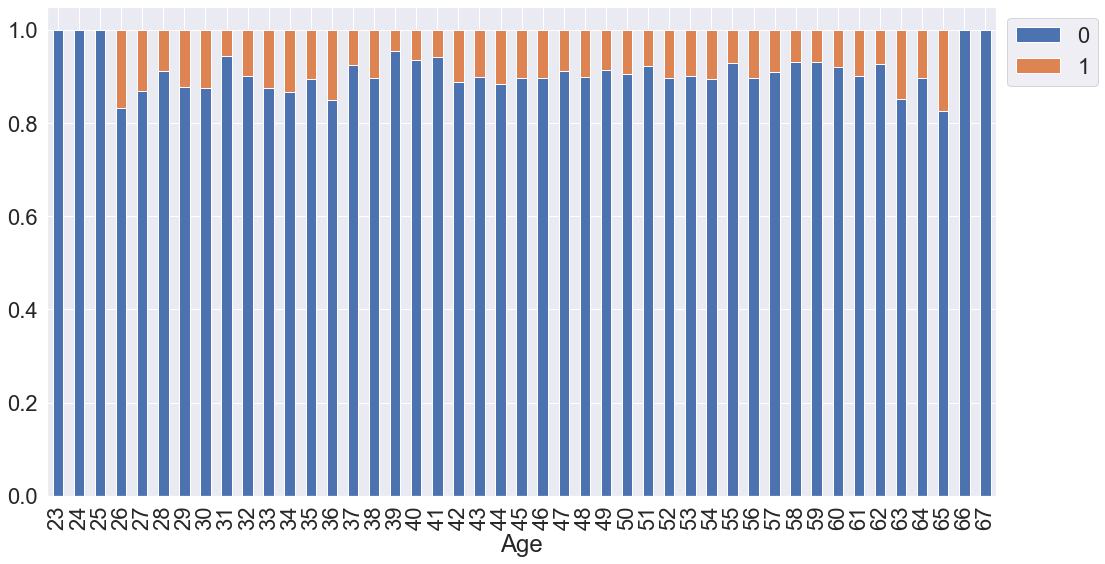

In [76]:
tab1 = pd.crosstab(df.Age,df.Personal_Loan,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.Age,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

### People with personal_loan aged from 26 to 65, all the age have similar percentage of Loan people

Personal_Loan     0    1   All
Experience                    
-3                4    0     4
-2               15    0    15
-1               33    0    33
0                59    7    66
1                66    8    74
2                76    9    85
3               112   17   129
4               104    9   113
5               132   14   146
6               107   12   119
7               109   12   121
8               101   18   119
9               127   20   147
10              111    7   118
11              103   13   116
12               86   16   102
13              106   11   117
14              121    6   127
15              114    5   119
16              114   13   127
17              114   11   125
18              125   12   137
19              121   14   135
20              131   17   148
21              102   11   113
22              111   13   124
23              131   13   144
24              123    8   131
25              128   14   142
26              120   14   134
27      

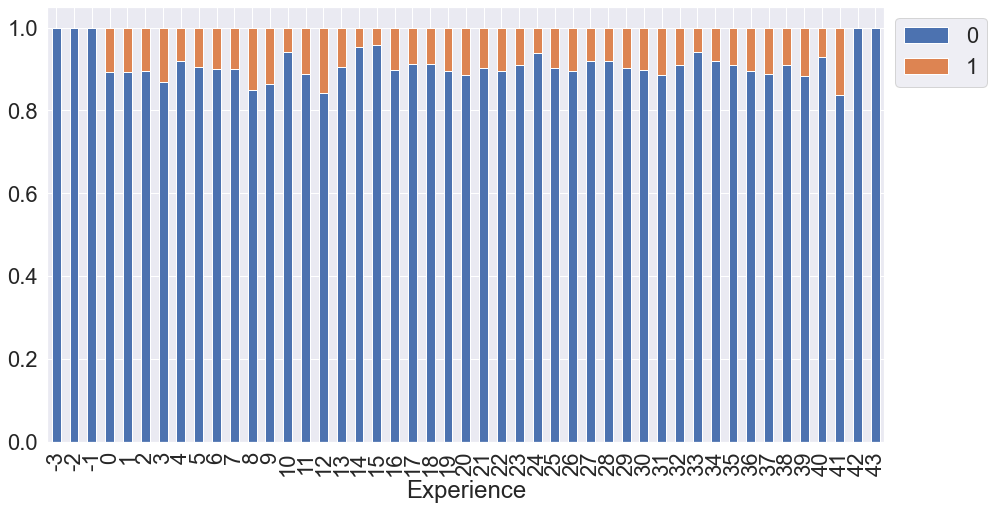

In [125]:
tab1 = pd.crosstab(df.Experience,df.Personal_Loan,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.Experience,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(15,8))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

###  customer with different experience have similar percentage of Loan

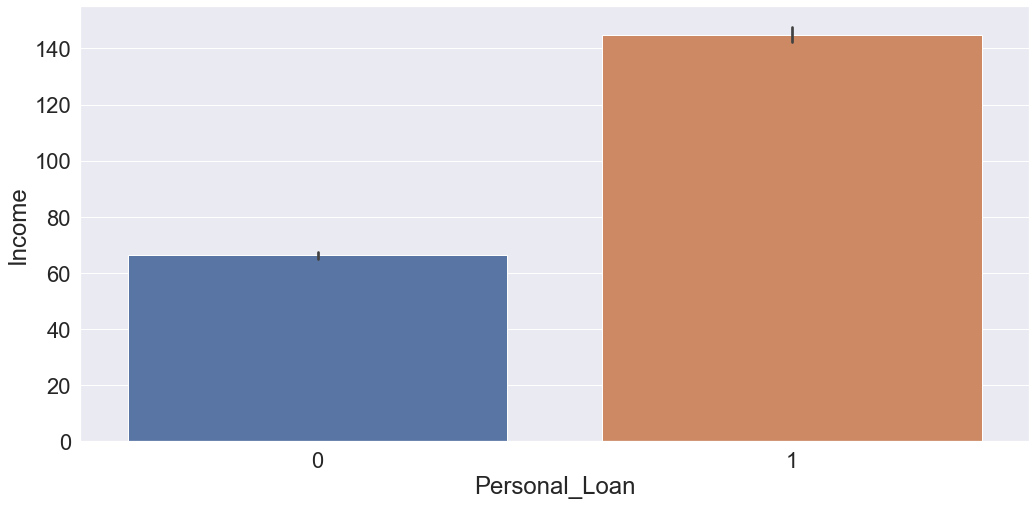

In [89]:
# let us look at Income and Personal_Loan
plt.figure(figsize=(17,8))
sns.barplot(x='Personal_Loan',y="Income",data=df)
plt.ylabel('Income');

### higher income customer turned to have Personal_Loan

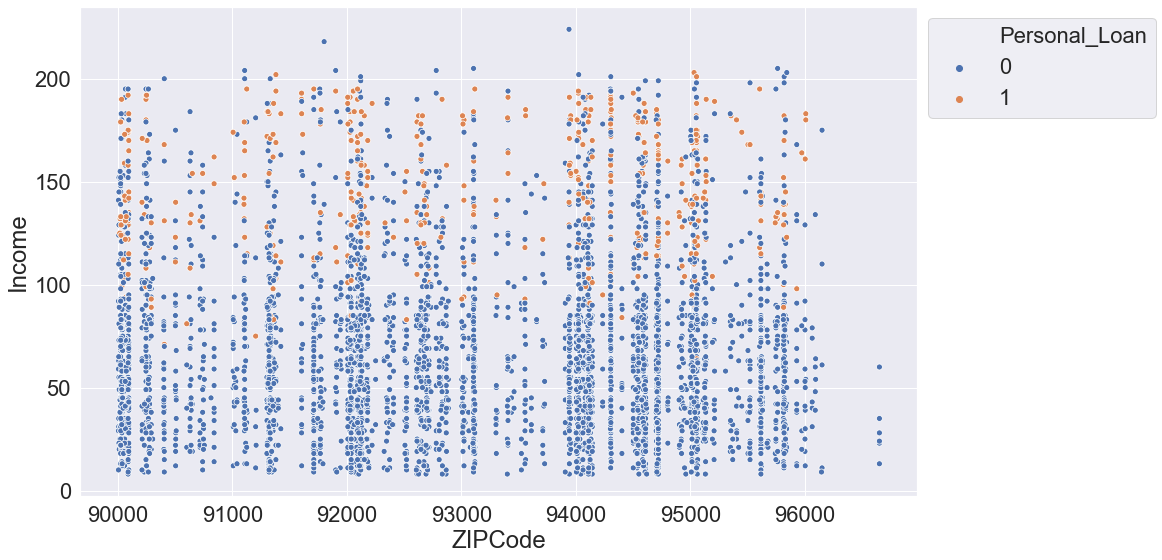

In [95]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=df.ZIPCode,y=df.Income,hue=df.Personal_Loan)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

###  ZIPcode does not correlated with income, and personal_loan, but still higher come people turned to have personal_Loan

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


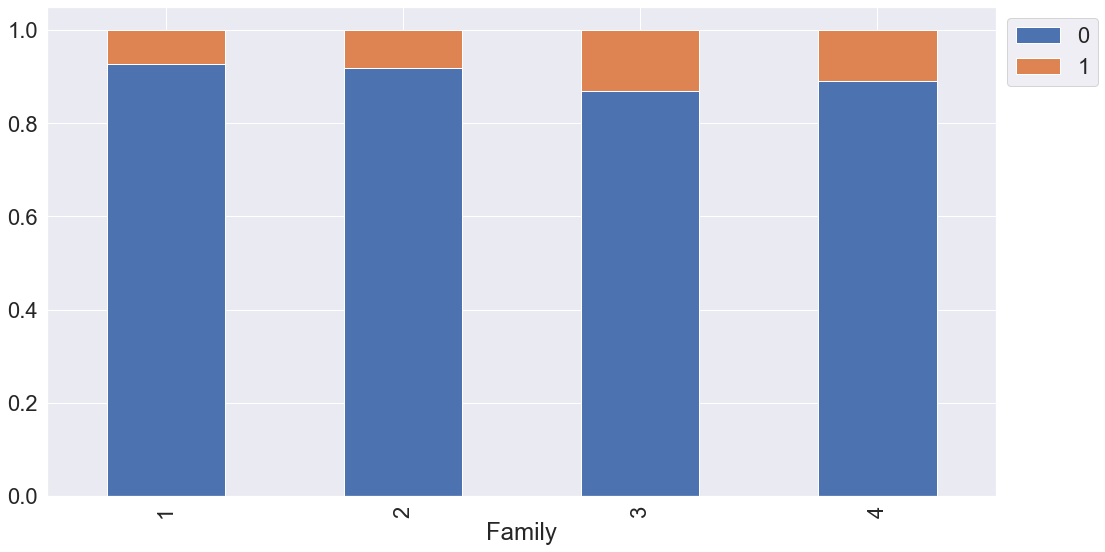

In [96]:
tab1 = pd.crosstab(df.Family,df.Personal_Loan,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.Family,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

### customer with larger family size have a higher percentage of buying Personal_Loan

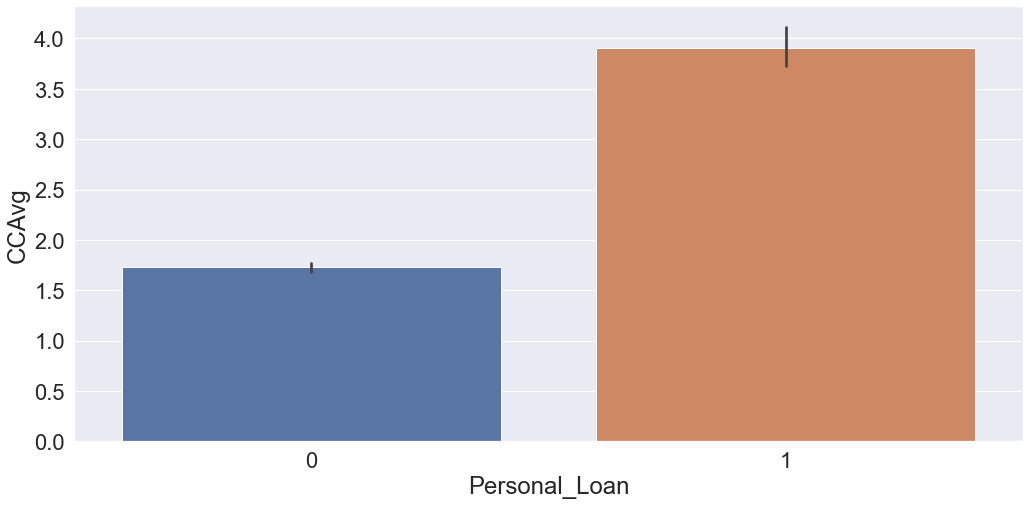

In [100]:
# let us look at family and Personal_Loan
plt.figure(figsize=(17,8))
sns.barplot(x='Personal_Loan',y="CCAvg",data=df)
plt.ylabel('CCAvg');

### Customer who spend more on credit card every month turned to buy Personal_Loan

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


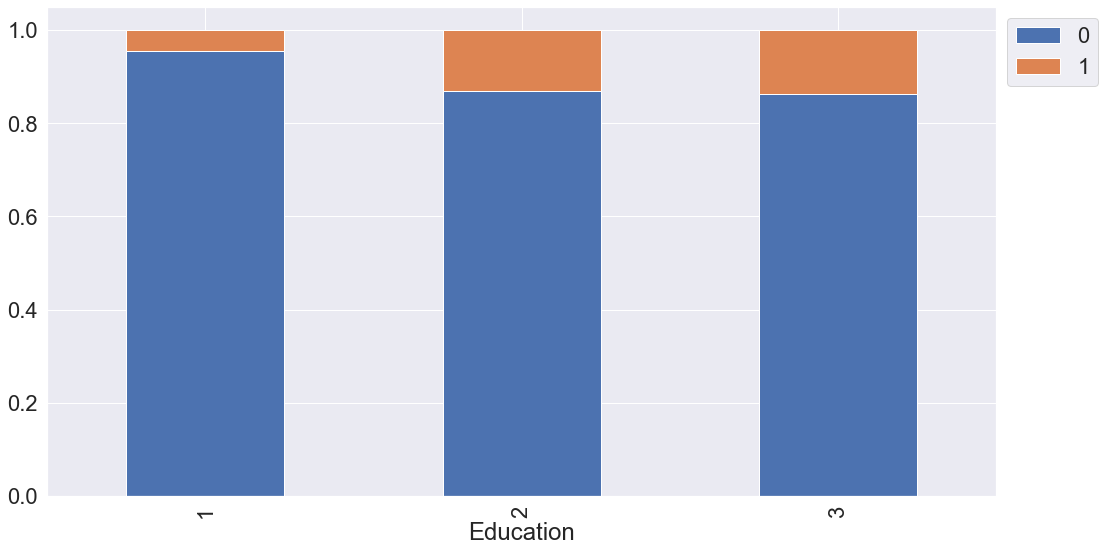

In [101]:
tab1 = pd.crosstab(df.Education,df.Personal_Loan,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.Education,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

###  Higher Education customer turned to buy Personal_Loan

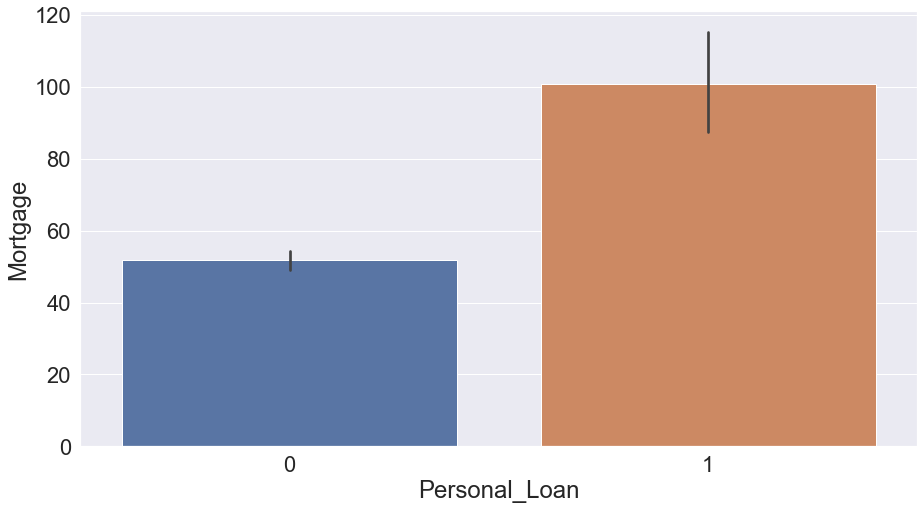

In [103]:
# let us look at Motegae and Personal_Loan
plt.figure(figsize=(15,8))
sns.barplot(x='Personal_Loan',y="Mortgage",data=df)
plt.ylabel('Mortgage');

### Higher Mortgage customer turned to buy Personal_Loan

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


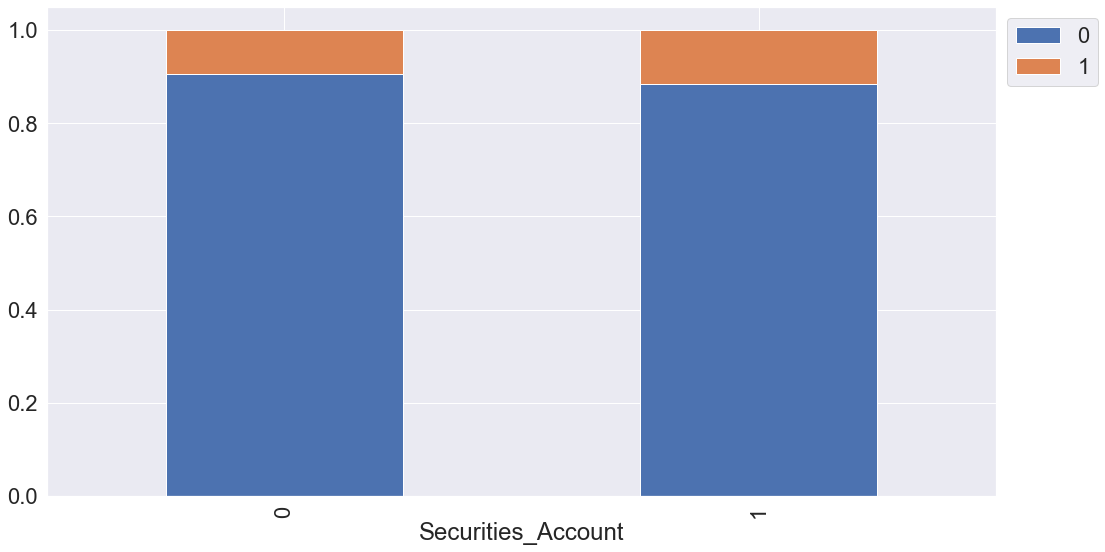

In [104]:
tab1 = pd.crosstab(df.Securities_Account,df.Personal_Loan,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.Securities_Account,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

### Customer with securities account have a slight higher chance of buying personal loan

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


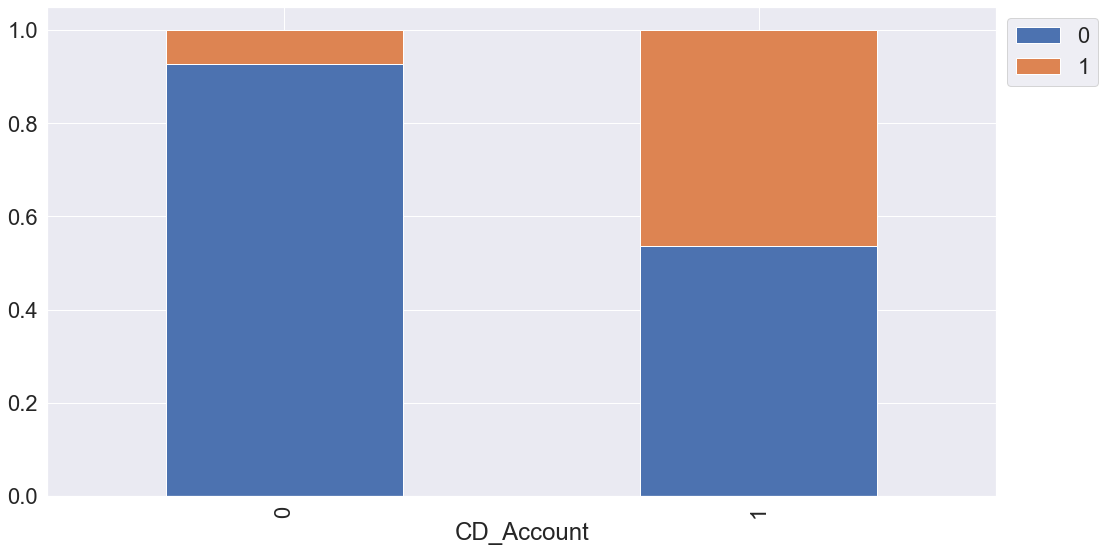

In [105]:
tab1 = pd.crosstab(df.CD_Account,df.Personal_Loan,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.CD_Account,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

### Customers with CD_account have a higher chance of buying personal_laon

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


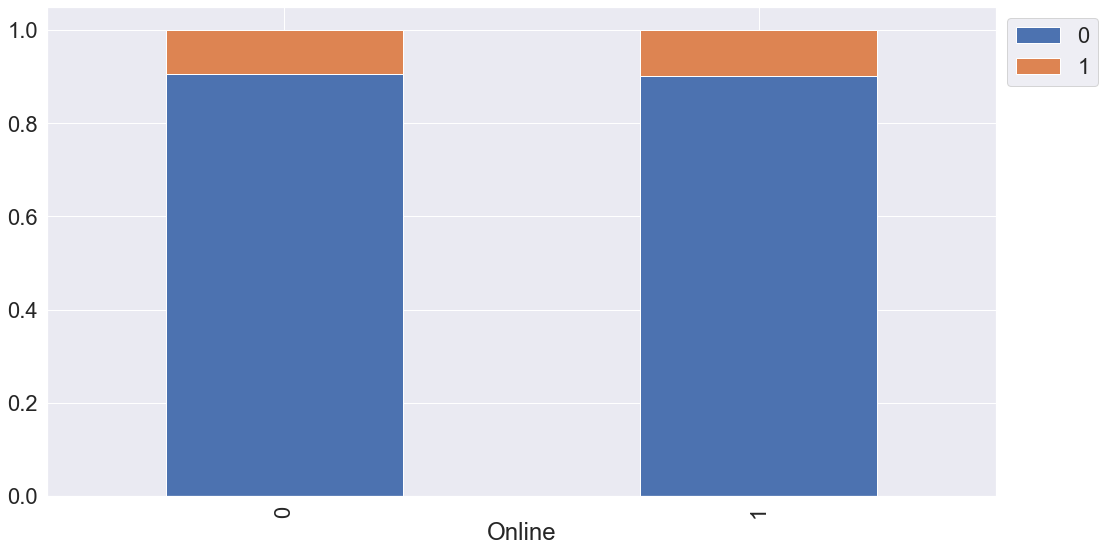

In [106]:
tab1 = pd.crosstab(df.Online,df.Personal_Loan,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.Online,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

### Online banking or not does not affect  chance of buying personal loan 

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


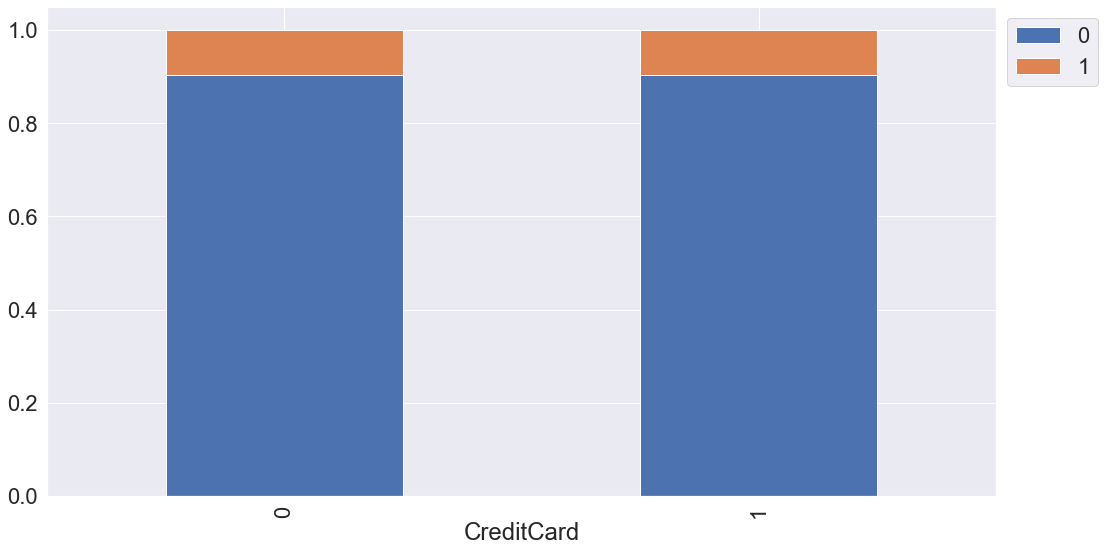

In [108]:
tab1 = pd.crosstab(df.CreditCard,df.Personal_Loan,margins=True)
print(tab1)
print('-'*120)
tab = pd.crosstab(df.CreditCard,df.Personal_Loan,normalize='index')
tab.plot(kind='bar',stacked=True,figsize=(17,9))
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

### Customer with credit card or not does not affect chance of buying personal_loan

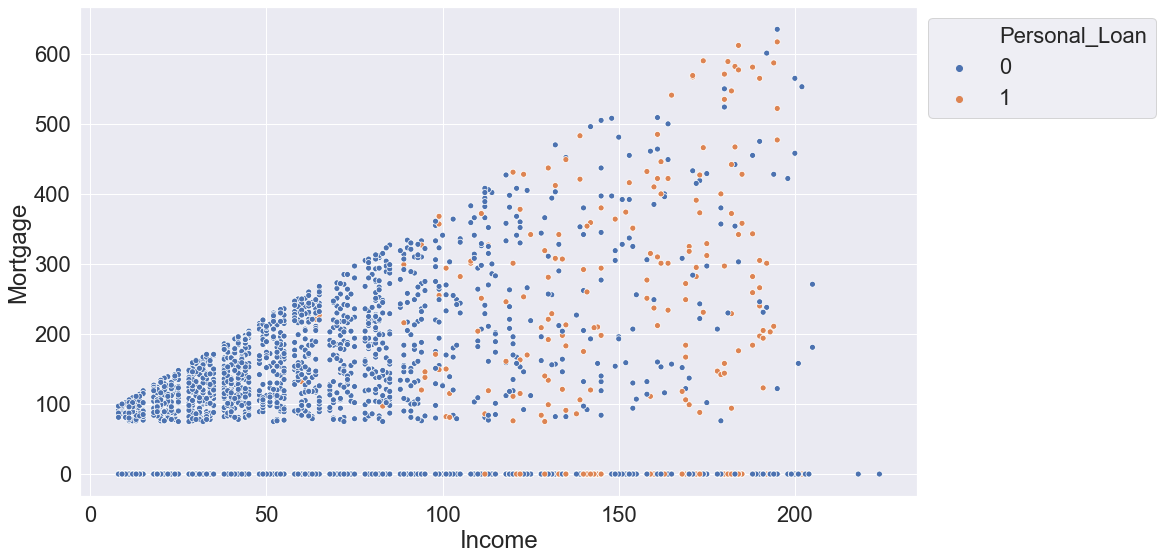

In [113]:
plt.figure(figsize=(15,9))
sns.scatterplot(x=df.Income, y=df.Mortgage, hue=df.Personal_Loan)
plt.legend(loc="upper left", bbox_to_anchor=(1,1));

### For people without personal_Loan, high income higher Mortgage, for people with personal_loan, they all have higher inocme with varies Mortgaeg

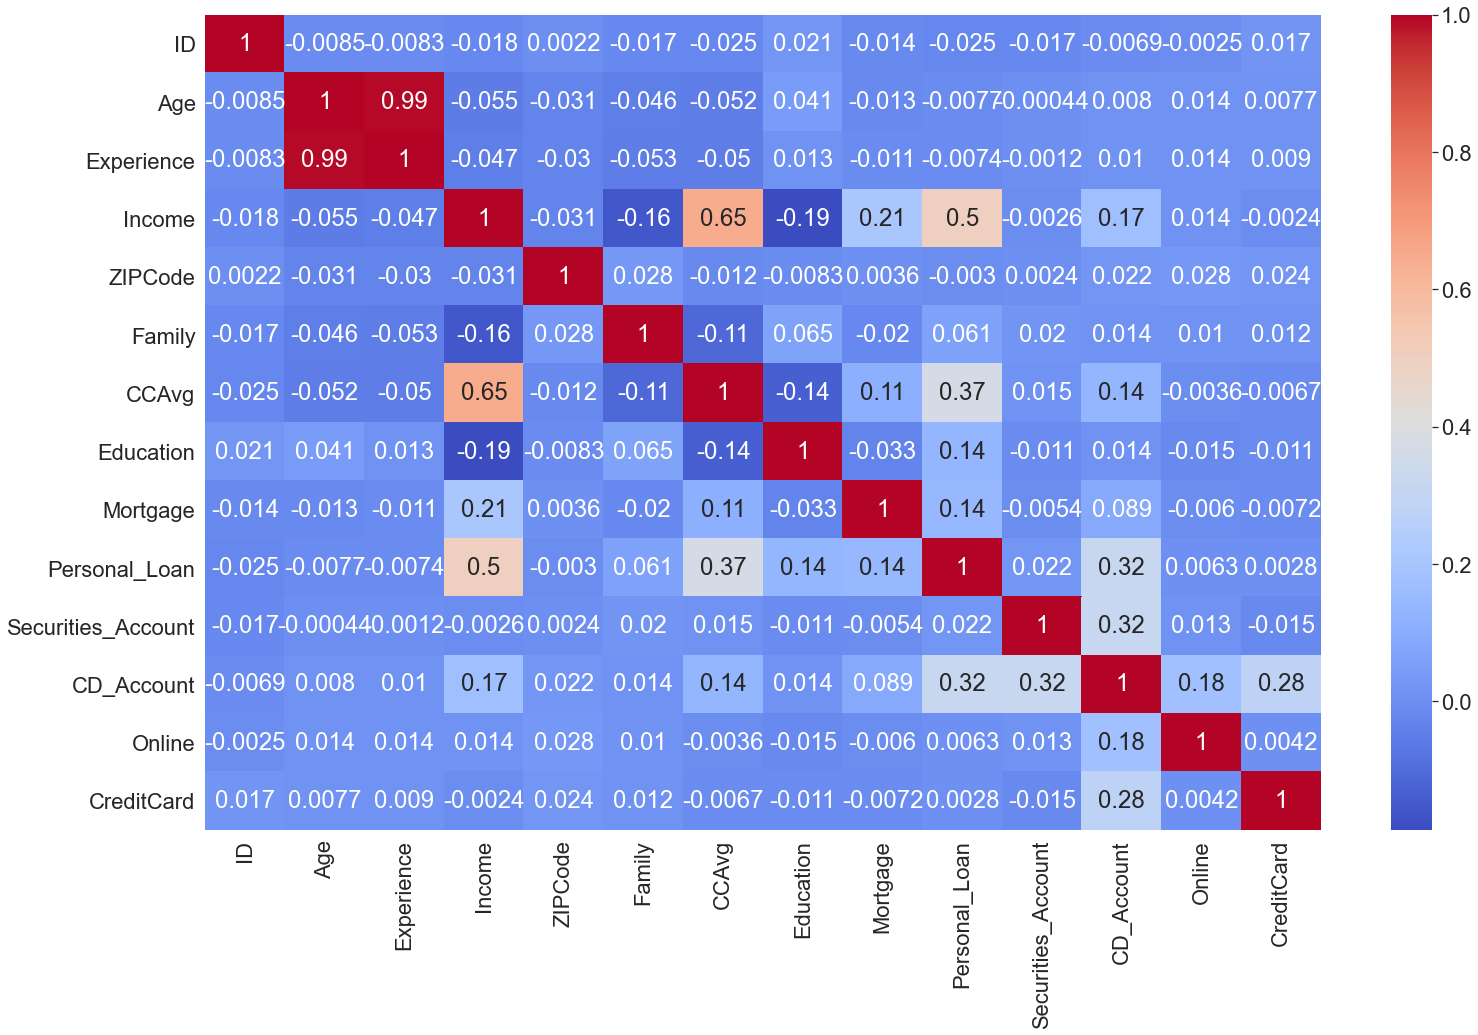

In [132]:
# plot correlation bwtween numerical columns
plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

#### ID number is not correlated with anything, we don't need it for analysis
#### Age is higly correlated with expeirence, which is plausible
#### Income is correlated with CCAvg, which make sense too. Income is also somehow correlated with Mortgage.
#### Personal_Loan is positively correlated with Income, CCAvg, CD_account,Creditcard, Education and mortgage.

# Data Pre_processing

In [136]:
# checking missing value
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### no missing value need to be filled

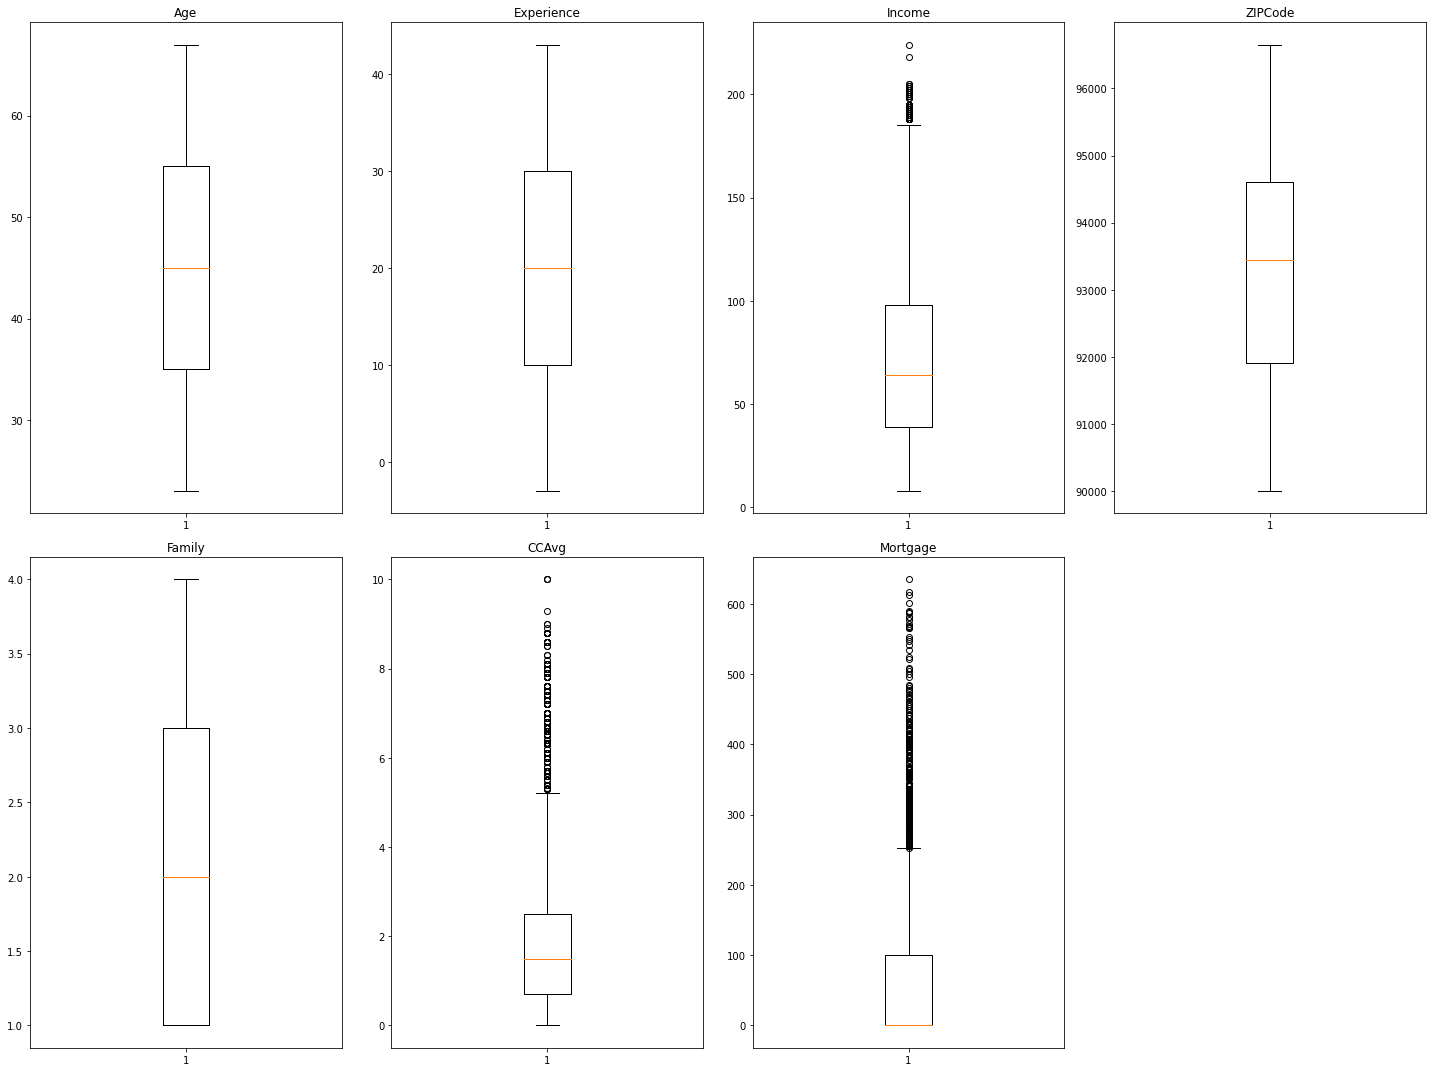

In [6]:
# outlier detection using boxplot
#numerical_col = df.select_dtypes(include=np.number).columns.tolist()
numerical_col = ['Age','Experience','Income','ZIPCode','Family','CCAvg','Mortgage']
plt.figure(figsize=(20,15))

for i, variable in enumerate(numerical_col):
                     plt.subplot(2,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### we only see outliers in Income, CCAvg and Mortgage columns

In [160]:
df.Mortgage.sort_values().astype(bool).sum(axis=0)

1538

In [8]:
def treat_outliers(df2,col):
    
    Q1=df2[col].quantile(0.25) # 25th quantile
    Q3=df2[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df2[col] = np.clip(df2[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df2

def treat_outliers_all(df2, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df2 = treat_outliers(df2,c)
        
    return df2
    

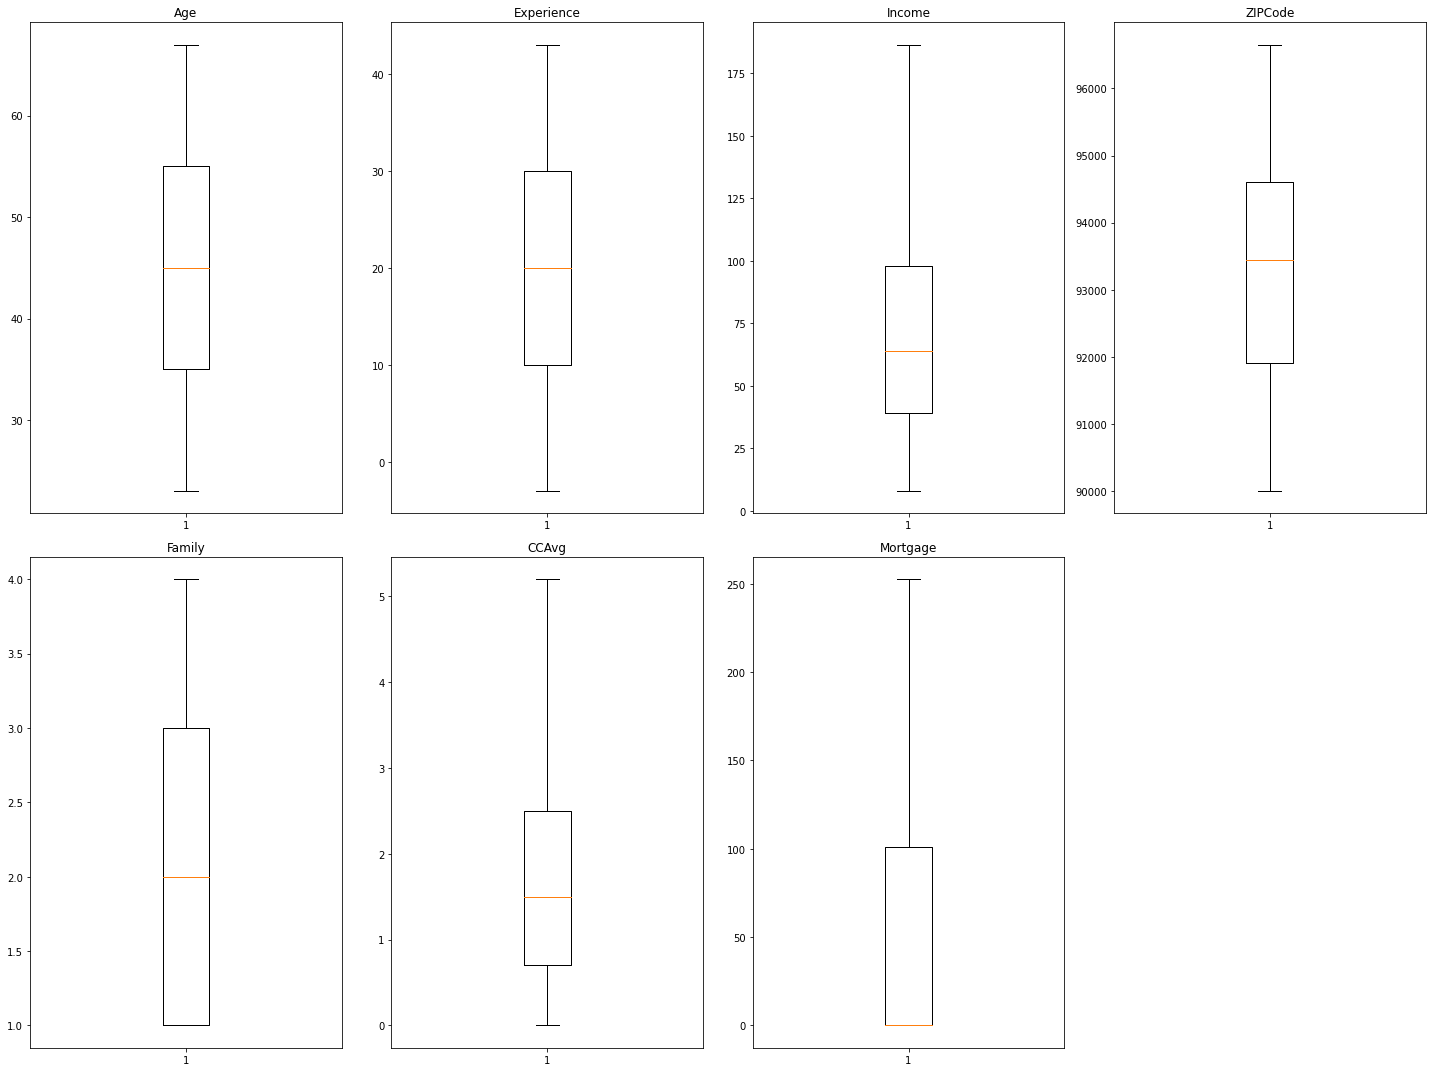

In [9]:
df1 = treat_outliers_all(df,numerical_col)
plt.figure(figsize=(20,15))

for i, variable in enumerate(numerical_col):
                     plt.subplot(2,4,i+1)
                     plt.boxplot(df1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Model building
### Data split for model

In [10]:
df1.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,2,45,19,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,3,39,15,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,4,35,9,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,5,35,8,45.0,91330,4,1.0,2,0.0,0,0,0,0,1


In [49]:
df2 = pd.get_dummies(df1, columns=['Education'],drop_first=True)
df2.Income = np.log(df2.Income)

## Defining X and Y variables
X = df2.drop(['Personal_Loan','ID'], axis=1)
Y = df2['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [50]:
df2.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,1,25,1,3.891820,91107,4,1.6,0.0,0,1,0,0,0,0,0
1,2,45,19,3.526361,90089,3,1.5,0.0,0,1,0,0,0,0,0
2,3,39,15,2.397895,94720,1,1.0,0.0,0,0,0,0,0,0,0
3,4,35,9,4.605170,94112,1,2.7,0.0,0,0,0,0,0,1,0
4,5,35,8,3.806662,91330,4,1.0,0.0,0,0,0,0,1,1,0


In [51]:
X.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,25,1,3.891820,91107,4,1.6,0.0,1,0,0,0,0,0
1,45,19,3.526361,90089,3,1.5,0.0,1,0,0,0,0,0
2,39,15,2.397895,94720,1,1.0,0.0,0,0,0,0,0,0
3,35,9,4.605170,94112,1,2.7,0.0,0,0,0,0,1,0
4,35,8,3.806662,91330,4,1.0,0.0,0,0,0,1,1,0


In [245]:
X_train.shape

(3500, 13)

In [242]:
len(y_train[y_train[:] == 1])

331

## Let's check split of the data

In [243]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### the split is 30% percent test and 70 percent train data, which is correct

In [244]:
print("Original True Values    : {0} ({1:0.2f}%)".format(len(df2.loc[df2['Personal_Loan'] == 1]), (len(df2.loc[df2['Personal_Loan'] == 1])/len(df2.index)) * 100))
print("Original False Values   : {0} ({1:0.2f}%)".format(len(df2.loc[df2['Personal_Loan'] == 0]), (len(df2.loc[df2['Personal_Loan'] == 0])/len(df2.index)) * 100))
print("")
print("Training data True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training data False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test data True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test data False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original True Values    : 480 (9.60%)
Original False Values   : 4520 (90.40%)

Training data True Values    : 331 (9.46%)
Training data False Values   : 3169 (90.54%)

Test data True Values        : 149 (9.93%)
Test data False Values       : 1351 (90.07%)



## the train data and test data have similar true/false rate as the original data

### Logistic Regression Using sklearn

In [52]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

## Let's look at Model Performances

**Prediction on train**

In [57]:
#Predict for train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix

def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of Personal_Loan
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,8))
    sns.heatmap(df_cm, annot=labels,fmt='')
   # plt.ylabel('True label')
   # plt.xlabel('Predicted label')


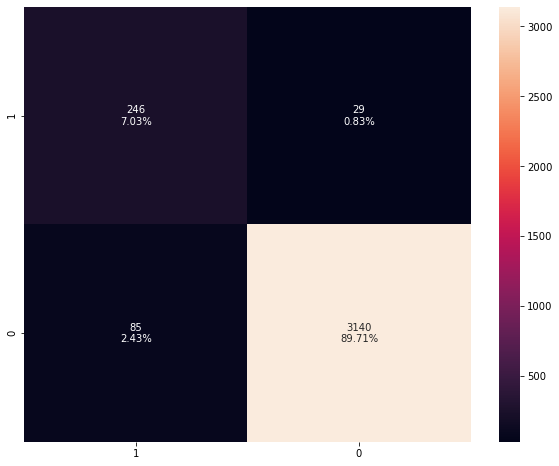

In [58]:
make_confusion_matrix(y_train,pred_train)

### prediction on test data

confusion matrix = 



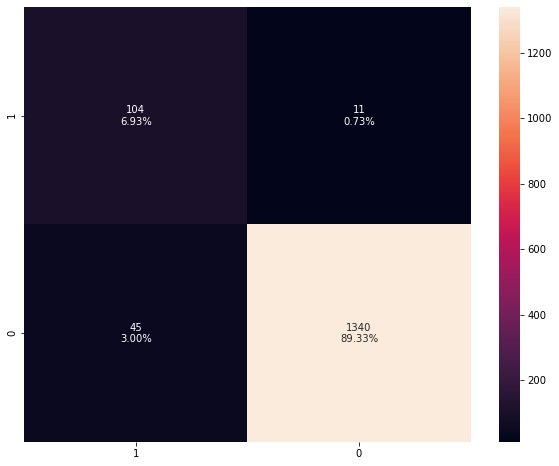

In [59]:
#Predict for test set
pred_test = logreg.predict(X_test)


print("confusion matrix = \n")
make_confusion_matrix(y_test,pred_test)

In [352]:
#Accuracy with a threhold of 0.5
from sklearn.metrics import accuracy_score
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

Accuracy on train data: 0.9637142857142857
Accuracy on test data: 0.9586666666666667


In [353]:
from sklearn.metrics import precision_score
print('precision on train data:',precision_score(y_train, pred_train) )
print('precision on test data:', precision_score(y_test, pred_test))

precision on train data: 0.8805970149253731
precision on test data: 0.8849557522123894


In [354]:
from sklearn.metrics import recall_score
print('recall on train data:',recall_score(y_train, pred_train) )
print('recall on test data:', recall_score(y_test, pred_test))

recall on train data: 0.7129909365558912
recall on test data: 0.6711409395973155


In [355]:
from sklearn.metrics import f1_score
print('f1 on train data:',f1_score(y_train, pred_train) )
print('f1 on test data:',f1_score(y_test, pred_test))

f1 on train data: 0.7879799666110183
f1 on test data: 0.7633587786259544


###  from the data, we know the true positive rate is 9.6% if the model was perfect. The model showing TP rate of 7% on both train and test data, it is a little bit below the truth, but not bad. the model performance score look good, recall is a little low, accuracy and precision are pretty good.

## AUC ROC curve

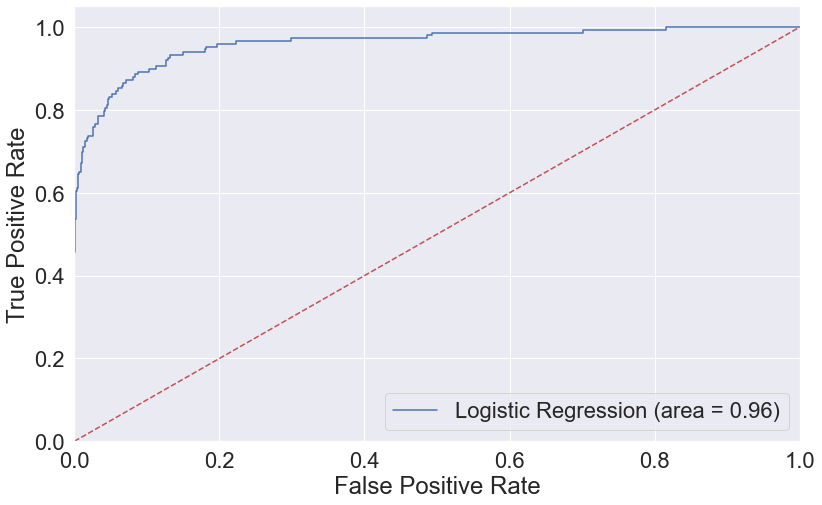

In [356]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## **Optimal threshold**

In [357]:
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.09151484689506294


In [358]:
target_names = ['1', '0']
y_pred_tr = (logreg.predict_proba(X_train)[:,1]>optimal_threshold).astype(int)
y_pred_ts = (logreg.predict_proba(X_test)[:,1]>optimal_threshold).astype(int)

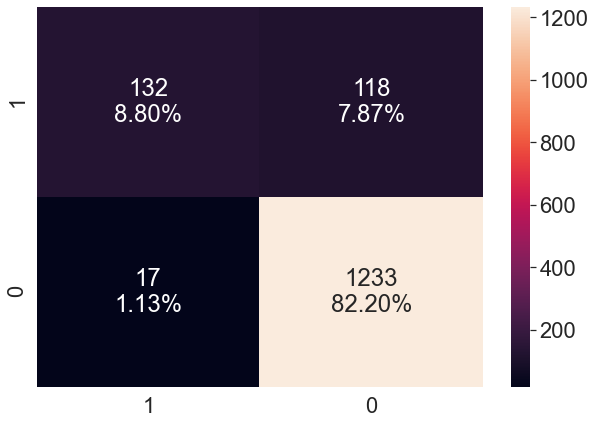

In [359]:
make_confusion_matrix(y_test,y_pred_ts)

In [360]:
#Accuracy with optimal threhold
#from sklearn.metrics import accuracy_score
print('Accuracy on train data:', accuracy_score(y_train, y_pred_tr) )
print('Accuracy on test data:', accuracy_score(y_test, y_pred_ts))

Accuracy on train data: 0.9042857142857142
Accuracy on test data: 0.91


In [361]:
print('precision on train data:', precision_score(y_train, y_pred_tr) )
print('precision on test data:', precision_score(y_test, y_pred_ts))

precision on train data: 0.49666666666666665
precision on test data: 0.528


In [362]:
print('recall on train data:', recall_score(y_train, y_pred_tr) )
print('recall on test data:', recall_score(y_test, y_pred_ts))

recall on train data: 0.9003021148036254
recall on test data: 0.8859060402684564


In [363]:
print('f1 on train data:', f1_score(y_train, y_pred_tr) )
print('f1 on test data:', f1_score(y_test, y_pred_ts))

f1 on train data: 0.6401718582169711
f1 on test data: 0.6616541353383459


### **Observation**
* After using optimal threshold we see that true positives have increased from 6.67% to 8.8%. and false positive has decreased from 3.27% to 1.13%. recall_score increased
* But ture nagtive rate increase, so precision has been decreased.
* THe accuracy of model decreased after optiaml threshold

### Check for multicollinearity

In [364]:
# dataframe with numerical column only
X2 = X.copy()
from statsmodels.tools import add_constant
X2 = add_constant(X2)
X2.head()

,const,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
0,1.00,25,1,49.00,91107,4,1.60,0.00,1,0,0,0,0,0
1,1.00,45,19,34.00,90089,3,1.50,0.00,1,0,0,0,0,0
2,1.00,39,15,11.00,94720,1,1.00,0.00,0,0,0,0,0,0
3,1.00,35,9,100.00,94112,1,2.70,0.00,0,0,0,0,1,0
4,1.00,35,8,45.00,91330,4,1.00,0.00,0,0,0,1,1,0


In [365]:
vif_series1 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])],index=X2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                3288.14
Age                    93.72
Experience             93.62
Income                  1.81
ZIPCode                 1.01
Family                  1.05
CCAvg                   1.70
Mortgage                1.02
Securities_Account      1.14
CD_Account              1.33
Online                  1.04
CreditCard              1.11
Education_2             1.29
Education_3             1.33
dtype: float64



### Age and Exprience are highly correlated as we know, so need to remove multicollinearity

In [366]:
X3 = X2.drop('Age', axis = 1 )

vif_series2 = pd.Series([variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])],index=X3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                2839.87
Experience              1.01
Income                  1.81
ZIPCode                 1.01
Family                  1.05
CCAvg                   1.69
Mortgage                1.02
Securities_Account      1.14
CD_Account              1.33
Online                  1.04
CreditCard              1.11
Education_2             1.27
Education_3             1.25
dtype: float64



### Multicollinearity has been removed

## Build the logistic regression model 

In [367]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y, test_size=0.30, random_state = 1 )

In [368]:
import statsmodels.api as sm
logit = sm.Logit(y3_train, X3_train)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.105979
         Iterations 10


In [369]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Sat, 26 Dec 2020   Pseudo R-squ.:                  0.6614
Time:                        12:28:44   Log-Likelihood:                -370.93
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                3.657e-303
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -12.6534      5.189     -2.438      0.015     -22.825      -2.482
Experience             0.0083      0.008      0.985      0.325      -0.008       0.025
Income              

## interpretation of coefficients

1, ZIPCode has a cofficeint of -0.000021, which is very minimum, means ZIPCode is not a significant varible. Pvalue of ZIPCode is 0.705, much larger than 0.05. Similarly, expirence and Mortgage have P value larger than 0.05, they are not significant either.
2, Income 's cofficient is 0.062, so increase of income is likely increase the chance of buying Personal_Loan.nThis relates to changes in odds by 6.20%.
3, similary, for the positive cofficeints, increase of 1 unit of those varibles will increase the chance of buying perconal_loan by the amount of coffients. For the negative cofficients, they function in an oppersite way.

## Pvalues

 #### form the P-values, we can see Exprience, ZIPCode and Mortgaeg are not as significant as other varibles, since the P-values of those three are larger than 0.05.

In [370]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [371]:
# FIlter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.05
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.20,66.62,0.99,0.00
Education_2,4.10,60.38,0.98,0.00
CD_Account,3.83,45.99,0.98,0.00
Family,0.70,2.02,0.67,0.00
CCAvg,0.46,1.58,0.61,0.00
Income,0.06,1.06,0.52,0.00
Online,-0.70,0.50,0.33,0.00
CreditCard,-1.07,0.34,0.25,0.00
Securities_Account,-1.11,0.33,0.25,0.01
const,-12.65,0.00,0.00,0.01


### so we could see education of level 3 increase almost 100% increase the chance of buying personal_loan, sinilarly we can interpret other varibles

## **Lets look at most significant variable**

In [372]:
# we are looking are overall significant varaible
pval_filter = lgcoef['pval']<=0.0001
imp_vars = lgcoef[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print('Most significant varaibles category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant varaibles  are '+end,':\n',sig_var)

Most significant varaibles category wise are :
 ['Education_3', 'Education_2', 'CD_Account', 'Family', 'CCAvg', 'Income', 'CreditCard']
************************************************************************************************************************
Most overall significant varaibles  are  :
 ['Education', 'CD_Account']


## Model performance evaluation and improvement

### Which metric is approperrate for this case?

#### The purpose of the model is to find out which customers are highly possible to buy Personal_loan, in order to not waste time and money on the customer who have slim chance of buy the loan, and save the cost of campaign. So accurate prediction are important ,  we want False positive and Ture magitive as low as posible.  Metric Precision should be evaluated. If recall could be high that is even better.

**Prediction on Train data**

confusion matrix = 



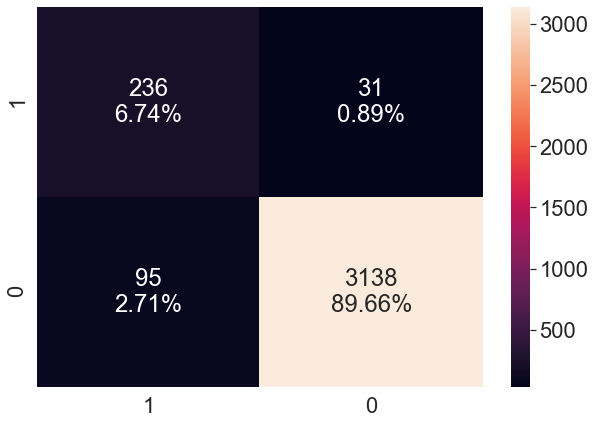

In [373]:
pred_train = lg.predict(X3_train)
pred_train = np.round(pred_train)

print("confusion matrix = \n")
make_confusion_matrix(y3_train,pred_train )

### Prediction on Test data

confusion matrix = 



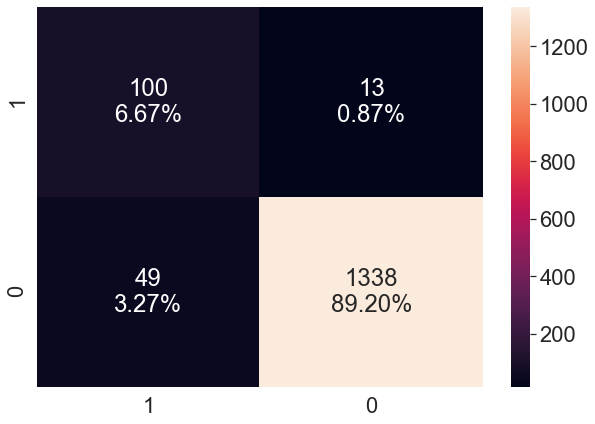

In [374]:
pred_ts = lg.predict(X3_test)#predict(X_train)
pred_ts = np.round(pred_ts)
# mat_tst = confusion_matrix(y_test,np.round(pred_ts))

print("confusion matrix = \n")
make_confusion_matrix(y3_test,pred_ts )

In [375]:
#Accuracy with a threhold of 0.5
#from sklearn.metrics import f1_score, precision_score, accuracy_score
print('Accuracy on train data:',accuracy_score(y3_train, pred_train) )
print('Accuracy on test data:', accuracy_score(y3_test, pred_ts))

Accuracy on train data: 0.964
Accuracy on test data: 0.9586666666666667


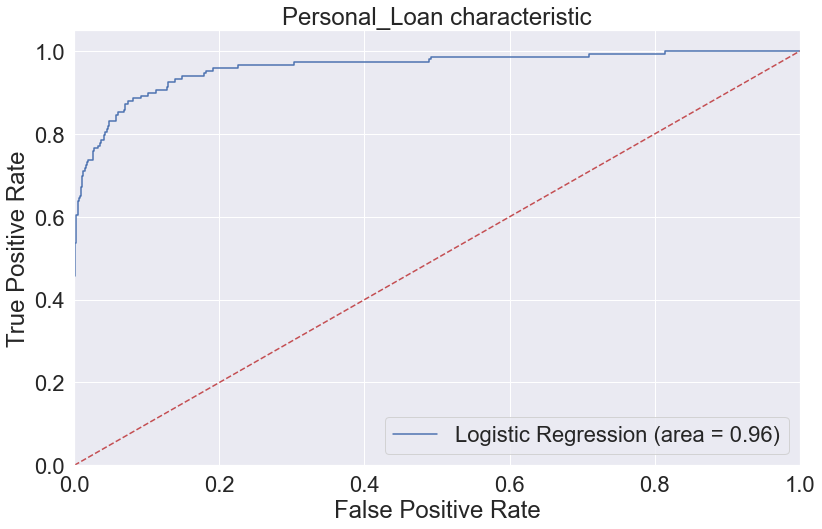

In [376]:
fpr, tpr, thresholds = roc_curve(y3_test, lg.predict(X3_test))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Personal_Loan characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Choosing Optimal threshold

In [377]:
pred_train = lg.predict(X3_train)
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y3_train, pred_train)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.06838907271441129


In [378]:
target_names = ['1', '0']
y_pred_tr = (lg.predict(X3_train)>optimal_threshold).astype(int)
y_pred_ts = (lg.predict(X3_test)>optimal_threshold).astype(int)

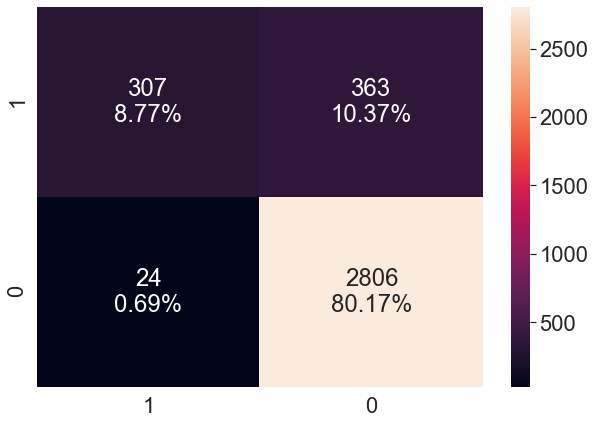

In [379]:
make_confusion_matrix(y3_train,y_pred_tr )

In [380]:
#Accuracy with optimal threshold
print('Accuracy on train data:', accuracy_score(y3_train,y_pred_tr) )
print('Accuracy on test data:',accuracy_score(y3_test,y_pred_ts))

Accuracy on train data: 0.8894285714285715
Accuracy on test data: 0.8913333333333333


In [382]:
print('precision on train data:', precision_score(y3_train,y_pred_tr) )
print('precision on test data:', precision_score(y3_test,y_pred_ts))

precision on train data: 0.4582089552238806
precision on test data: 0.475177304964539


In [383]:
print('recall on train data:', recall_score(y3_train,y_pred_tr) )
print('recall on test data:', recall_score(y3_test,y_pred_ts))

recall on train data: 0.9274924471299094
recall on test data: 0.8993288590604027


In [381]:
print('f1 on train data:', f1_score(y3_train,y_pred_tr) )
print('f1 on test data:', f1_score(y3_test,y_pred_ts))

f1 on train data: 0.6133866133866135
f1 on test data: 0.6218097447795824


####  Accuracy on the model is pretty good, but after optimal threshold, precision decrease a lot, as well as recall increase. We know that when recall increase, precision would drop. 
#### THe overal model performance is not bad, no overfitting or underfitting was observed. the most important features are:'Education_3', 'Education_2', 'CD_Account', 'Family', 'CCAvg', 'Income', 'CreditCard' based on the model

## Decision Tree

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1. since the 1s are less than 10% percent and it is better to give more weight on it.

In [1]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [13]:
X_train.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
1334,47,22,35.0,94304,2,1.3,0.0,0,0,1,0,0,0
4768,38,14,39.0,93118,1,2.0,0.0,0,0,1,0,1,0
65,59,35,131.0,91360,1,3.8,0.0,0,0,1,1,0,0
177,29,3,65.0,94132,4,1.8,244.0,0,0,0,0,1,0
4489,39,13,21.0,95518,3,0.2,0.0,0,0,1,0,1,0


In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [15]:
def make_confusion_matrix(y_actual, model, labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')

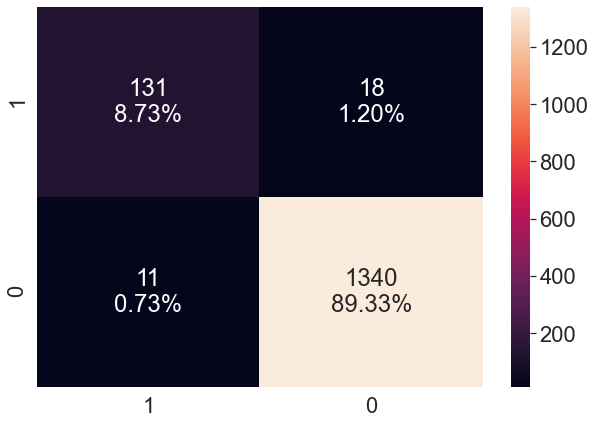

In [401]:
make_confusion_matrix(y_test, model)

## The model is pretty good, TP and TN are both high as well as FP and FN are low

In [402]:
y_train.value_counts(1)

0   0.91
1   0.09
Name: Personal_Loan, dtype: float64

In [16]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [21]:
##  Function to calculate precsion score
def get_precision_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("precision on training set : ",metrics.precision_score(y_train,pred_train))
    print("precision on test set : ",metrics.precision_score(y_test,pred_test))

In [22]:
##  Function to calculate precsion score
def get_accuracy_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("accuracy on training set : ",metrics.accuracy_score(y_train,pred_train))
    print("accuracy on test set : ",metrics.accuracy_score(y_test,pred_test))

In [25]:
get_accuracy_score(model)

accuracy on training set :  1.0
accuracy on test set :  0.9806666666666667


In [24]:
get_precision_score(model)

precision on training set :  1.0
precision on test set :  0.9225352112676056


## Decision Tree model

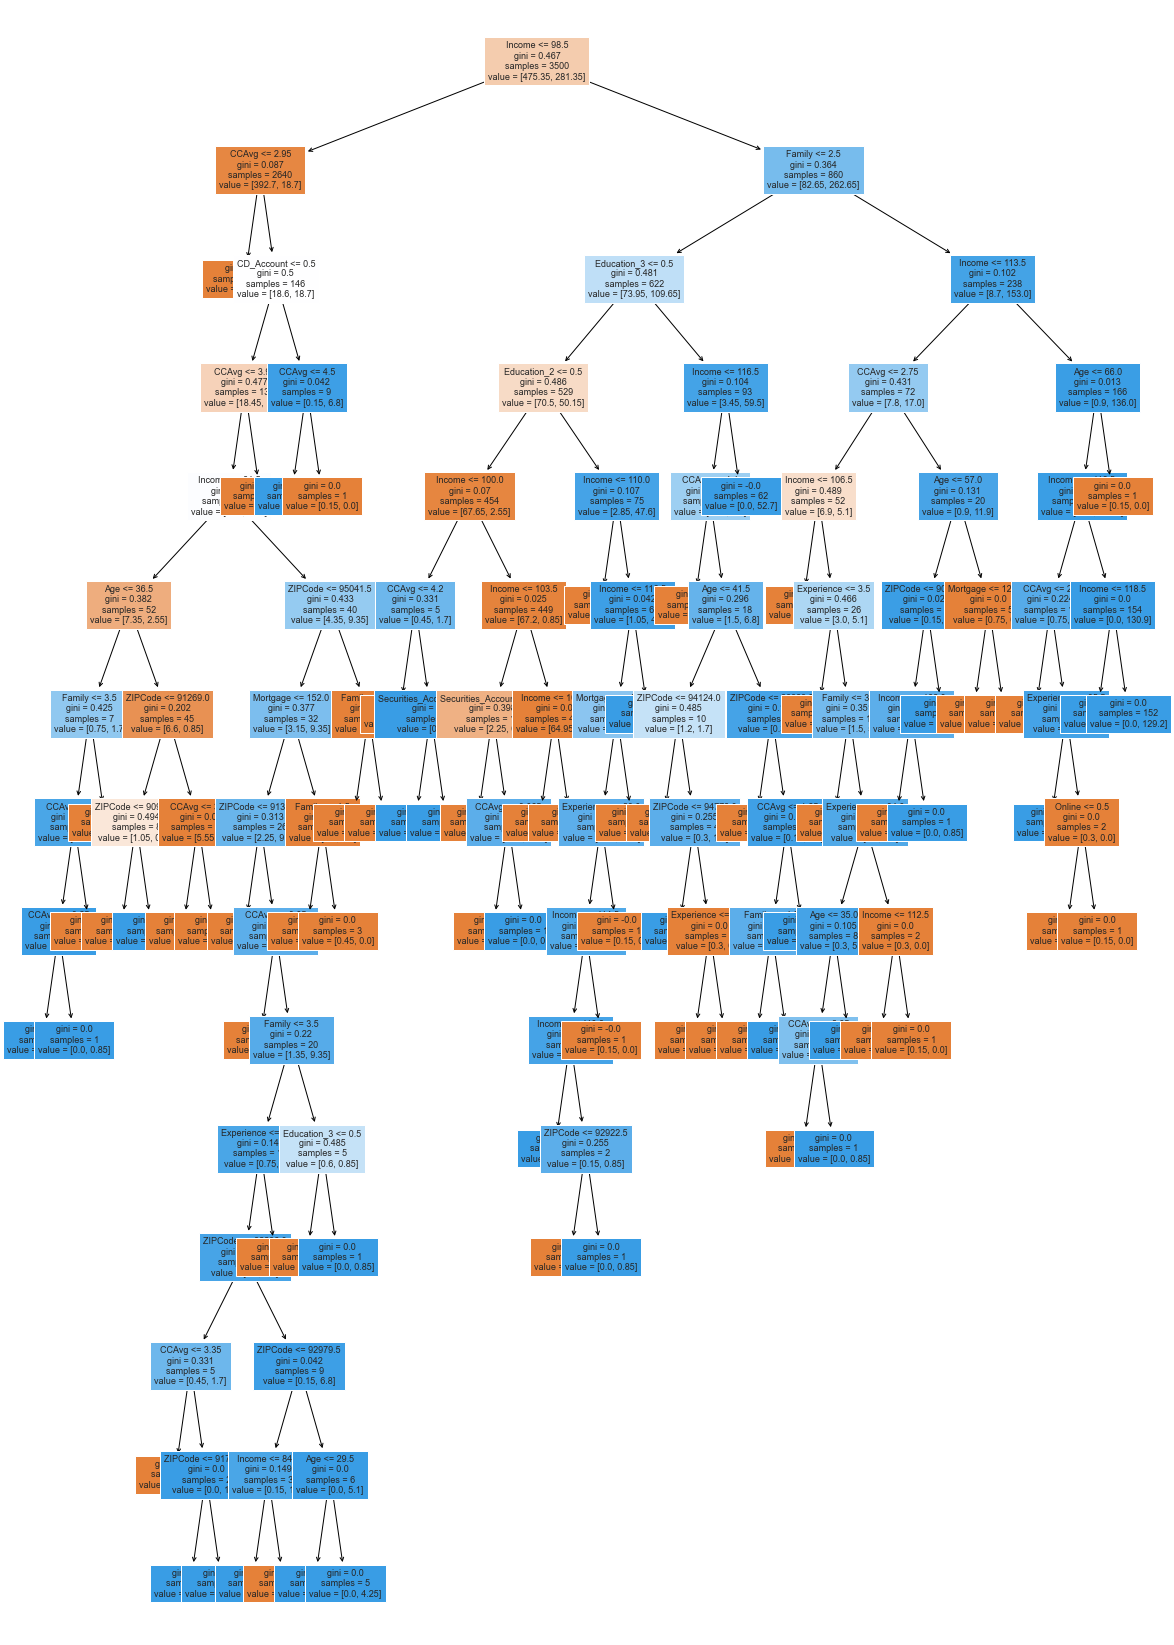

In [411]:
from sklearn import tree
column_names = list(X_train.columns)
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names = column_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [412]:
print(tree.export_text(model,feature_names=column_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode <= 91269.00
|   |   |   |   |   |   |   |--- ZIPCode <= 90974.00
|   |   |   |   |   |   |   |   |--- weights: [1.

In [26]:
print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                             Imp
Income              5.940689e-01
Education_2         1.366862e-01
CCAvg               8.178100e-02
Education_3         6.761878e-02
Family              6.643472e-02
ZIPCode             1.602732e-02
CD_Account          1.099955e-02
Age                 9.959584e-03
Experience          8.540581e-03
Mortgage            5.114115e-03
Securities_Account  2.769228e-03
Online              4.051662e-18
CreditCard          0.000000e+00


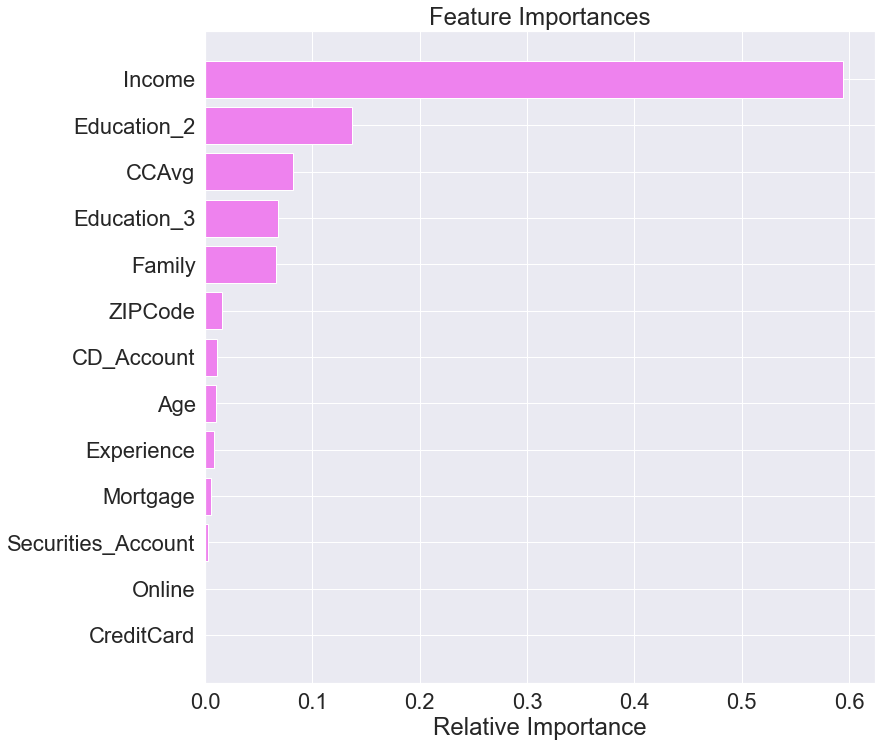

In [415]:
importances = model.feature_importances_
indices = np.argsort(importances)

feature_names = column_names
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Income is the most important varibles based on the tree, then education_2, and so on.
### Although the model performance is good,  the tree above is very complex and difficult to interpret, we need prunning the tree

## Cost Complexity Pruning

In [29]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [30]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-6.619516e-15
1,1.320471e-19,-6.619384e-15
2,7.482671e-19,-6.618636e-15
3,7.482671e-19,-6.617887e-15
4,7.482671e-19,-6.617139e-15
5,1.760629e-18,-6.615378e-15
6,1.892676e-18,-6.613486e-15
7,2.993069e-18,-6.610493e-15
8,4.291532e-18,-6.606201e-15
9,6.514326e-18,-6.599687e-15


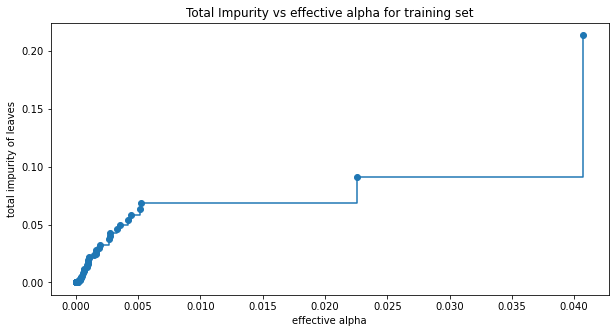

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [32]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489481023


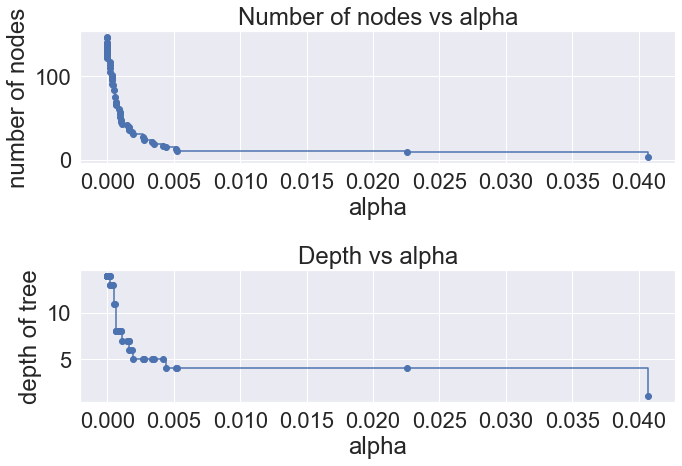

In [420]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [33]:
precision_train=[]
for clf in clfs:
    pred_train10=clf.predict(X_train)
    values_train=metrics.precision_score(y_train,pred_train10)
    precision_train.append(values_train)

In [34]:
precision_test=[]
for clf in clfs:
    pred_test10=clf.predict(X_test)
    values_test=metrics.precision_score(y_test,pred_test10)
    precision_test.append(values_test)

In [35]:
recall_train=[]
for clf in clfs:
    pred_train10=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train10)
    recall_train.append(values_train)

In [36]:
recall_test=[]
for clf in clfs:
    pred_test10=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test10)
    recall_test.append(values_test)

In [432]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
clf

DecisionTreeClassifier(ccp_alpha=0.04072766323579128,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

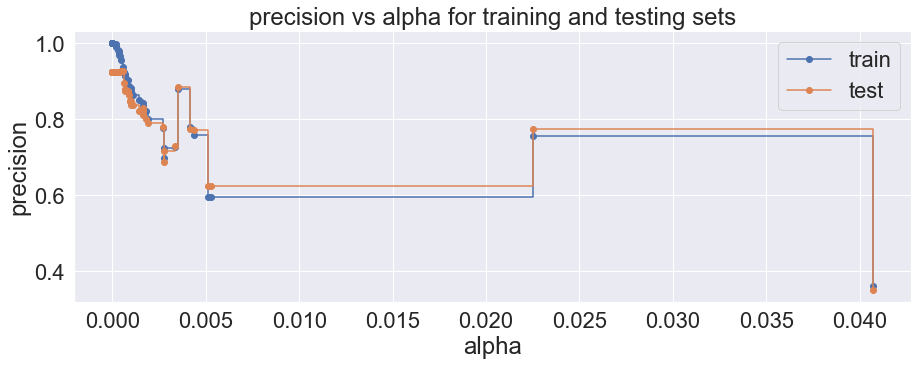

In [429]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("precision")
ax.set_title("precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, precision_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

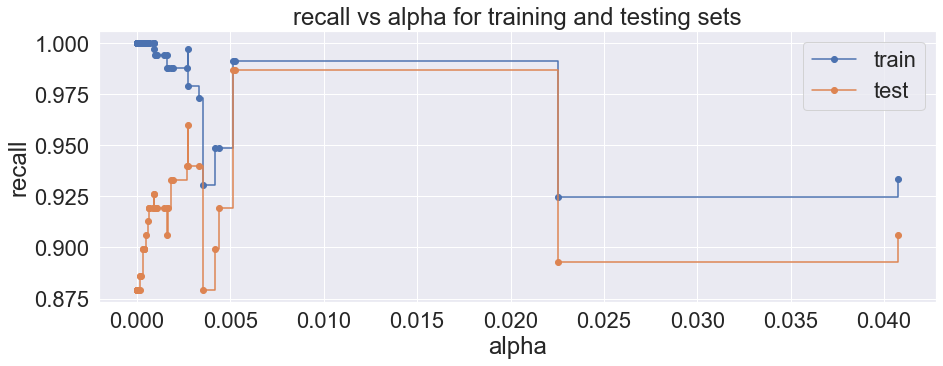

In [472]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(precision_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0005907778990761937,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [435]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0005907778990761937,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [38]:
get_precision_score(best_model)

precision on training set :  0.9376770538243626
precision on test set :  0.9251700680272109


In [39]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.912751677852349


In [40]:
get_accuracy_score(best_model)

accuracy on training set :  0.9937142857142857
accuracy on test set :  0.984


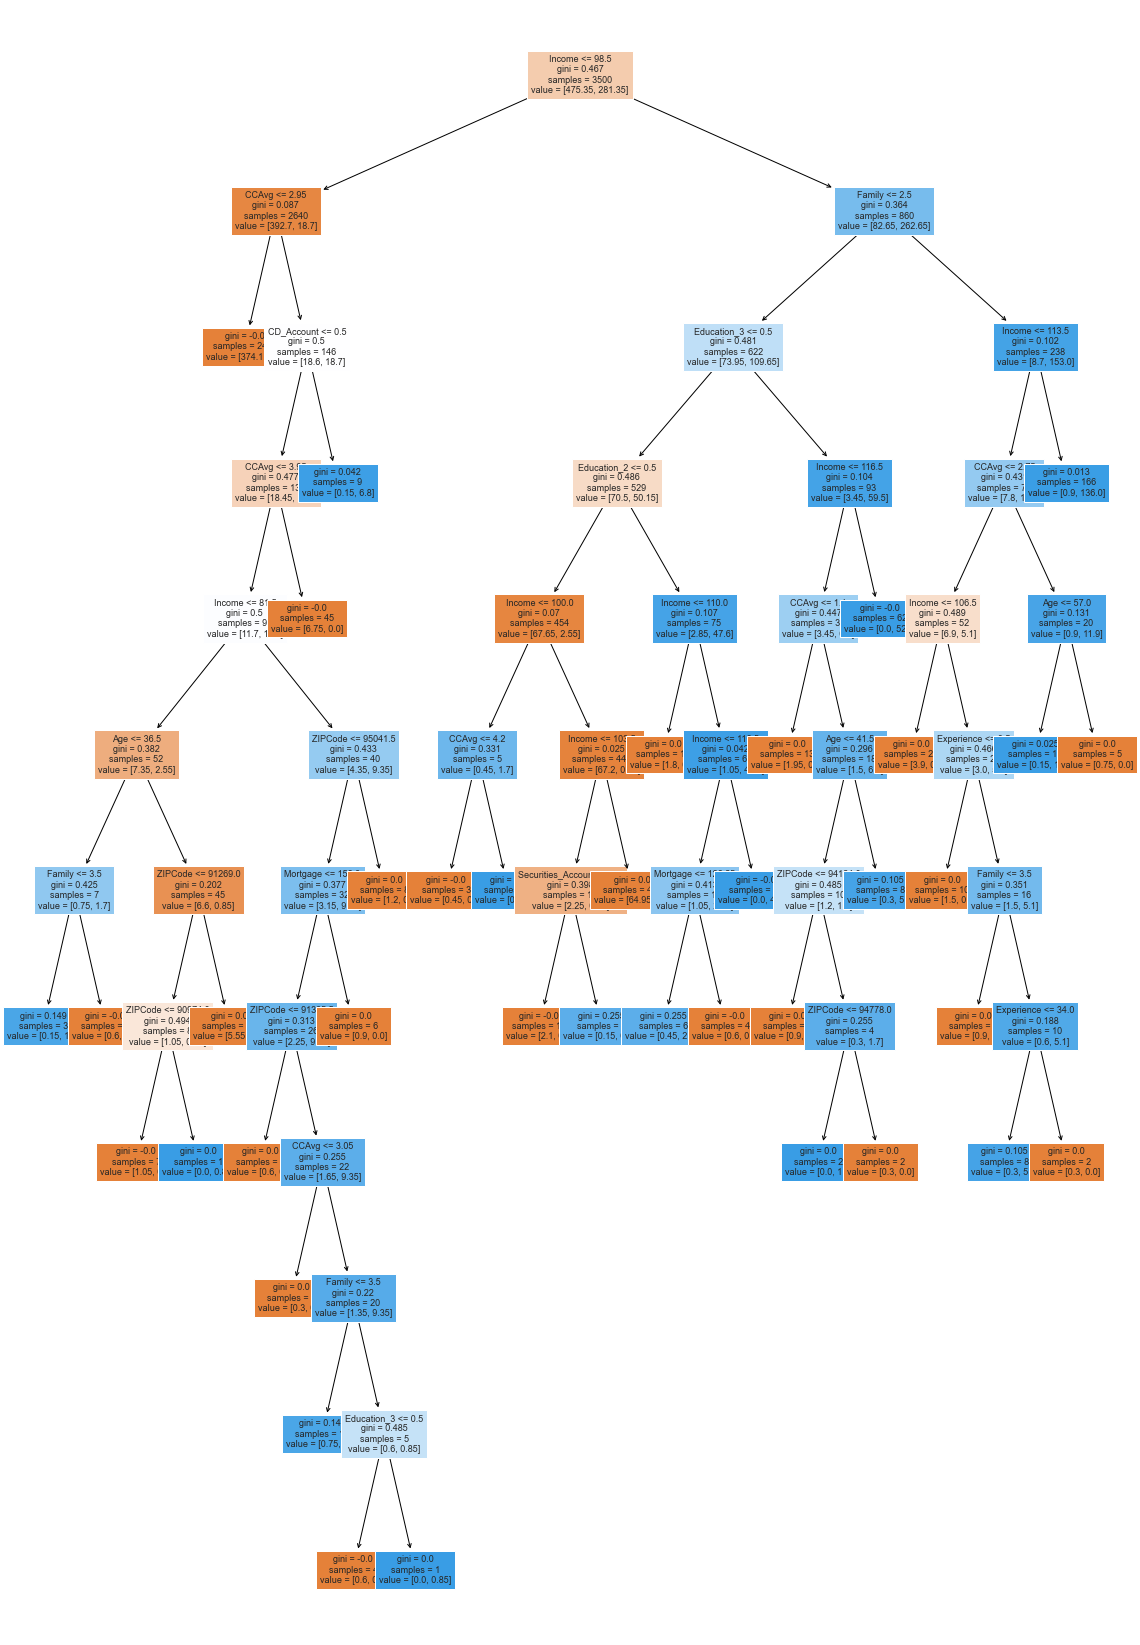

In [447]:
plt.figure(figsize=(20,30))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [450]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.60
Education_2        0.14
CCAvg              0.08
Education_3        0.07
Family             0.07
ZIPCode            0.01
CD_Account         0.01
Age                0.01
Experience         0.01
Mortgage           0.01
Securities_Account 0.00
Online             0.00
CreditCard         0.00


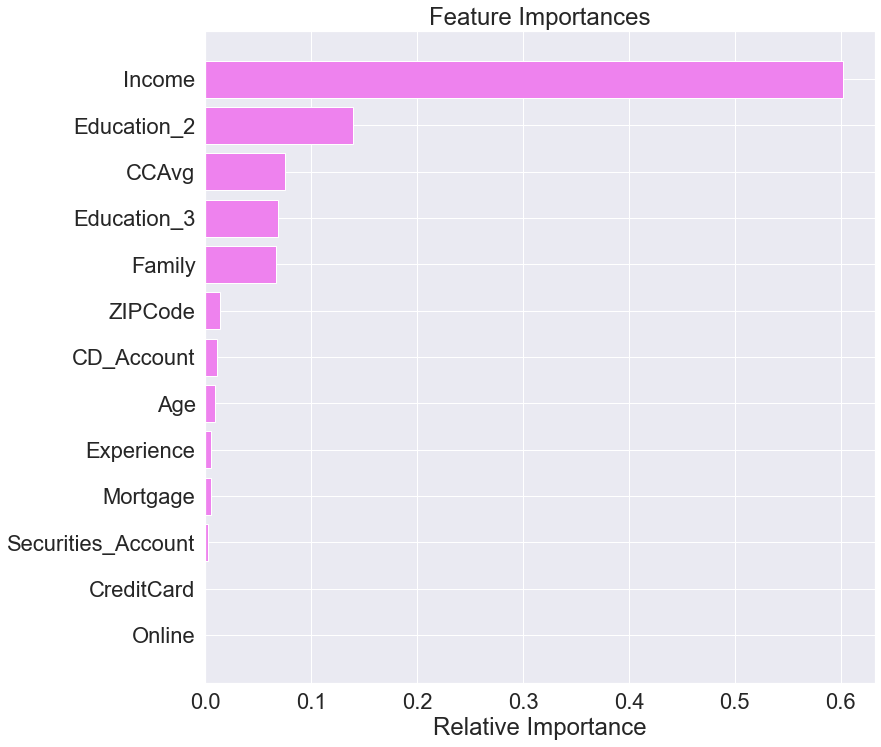

In [469]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### the Tree is still complex, although the scores are very high, so the pruning is not effective

## try another alpha

In [41]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.004,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

In [42]:
get_precision_score(best_model2)

precision on training set :  0.8774928774928775
precision on test set :  0.8851351351351351


In [43]:
get_recall_score(best_model2)

Recall on training set :  0.9305135951661632
Recall on test set :  0.8791946308724832


In [44]:
get_accuracy_score(best_model2)

accuracy on training set :  0.9811428571428571
accuracy on test set :  0.9766666666666667


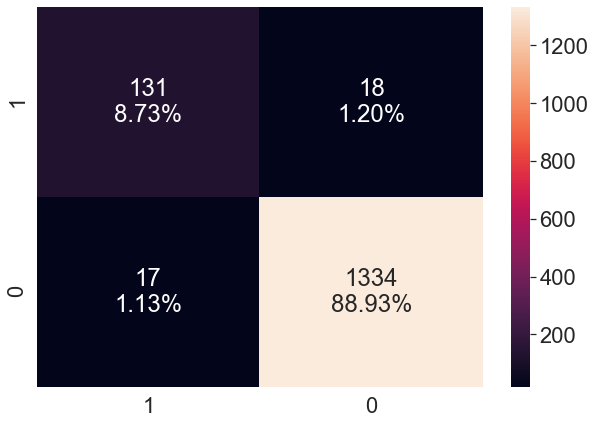

In [480]:
make_confusion_matrix(y_test, best_model2)

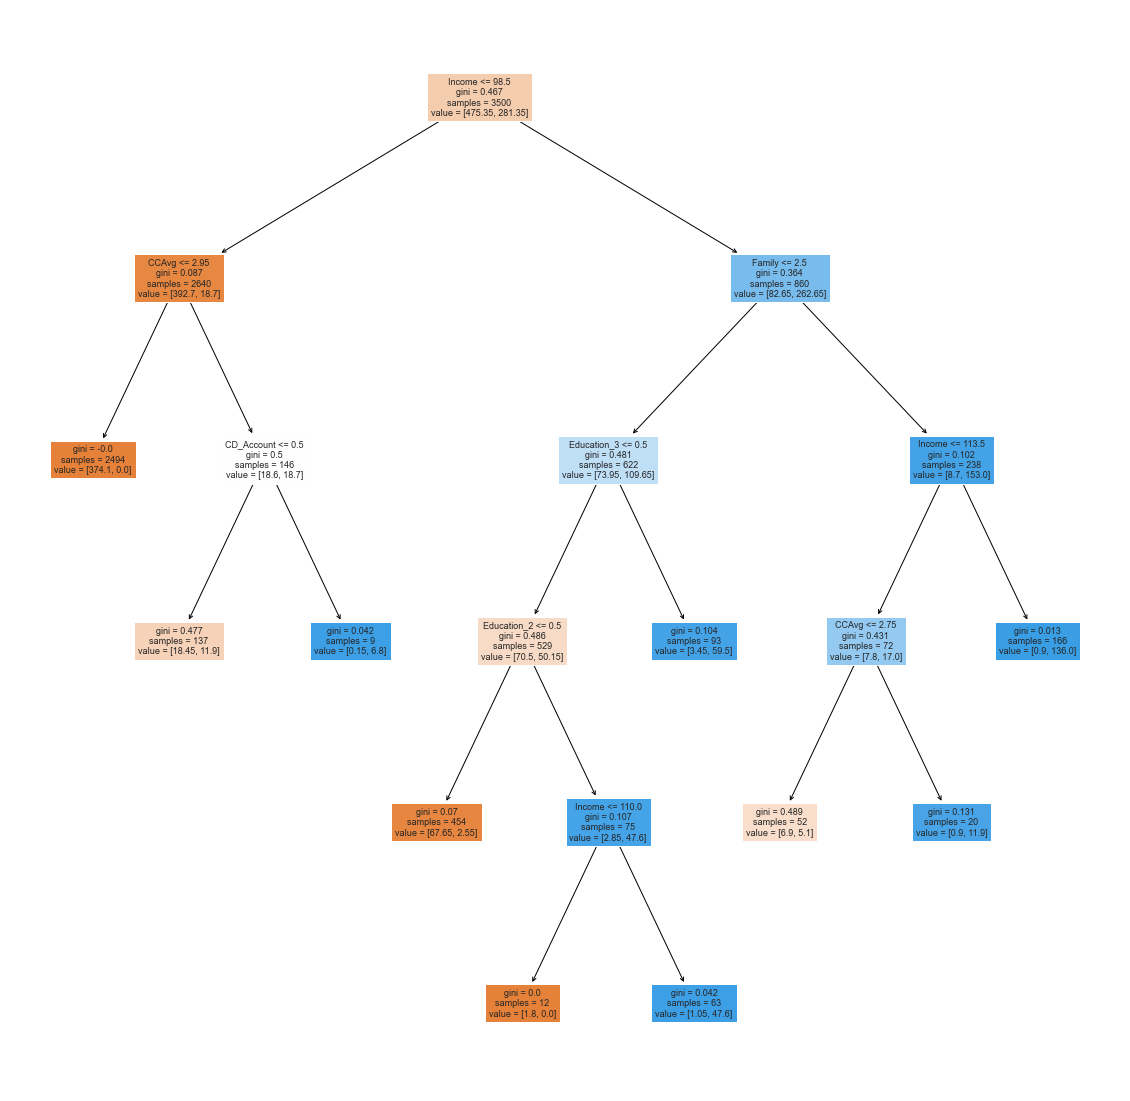

In [464]:
plt.figure(figsize=(20,20))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [456]:
print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.63
Education_2        0.15
Education_3        0.07
Family             0.07
CCAvg              0.06
CD_Account         0.01
Age                0.00
Experience         0.00
ZIPCode            0.00
Mortgage           0.00
Securities_Account 0.00
Online             0.00
CreditCard         0.00


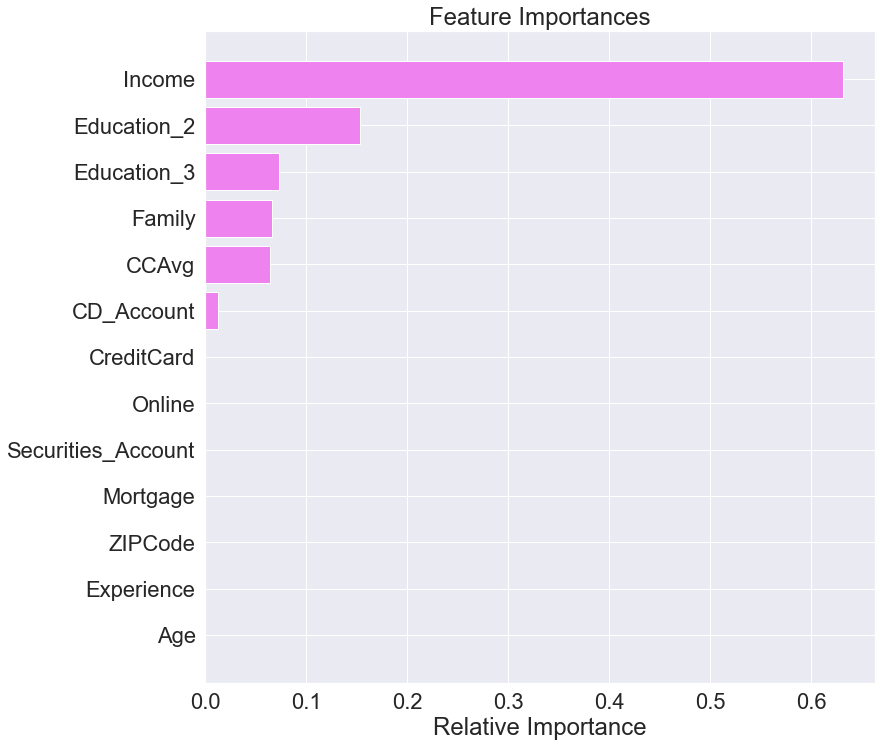

In [457]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##  The model2 tree is much simpler and easy to interpret, it is a much effective prunning. and the scores are still pretty good.

## let's try another model  based on recall

In [45]:
best_model3 = DecisionTreeClassifier(ccp_alpha=0.005,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

In [46]:
get_precision_score(best_model3)

precision on training set :  0.7566265060240964
precision on test set :  0.7696629213483146


In [47]:
get_recall_score(best_model3)

Recall on training set :  0.9486404833836858
Recall on test set :  0.9194630872483222


In [48]:
get_accuracy_score(best_model3)

accuracy on training set :  0.9662857142857143
accuracy on test set :  0.9646666666666667


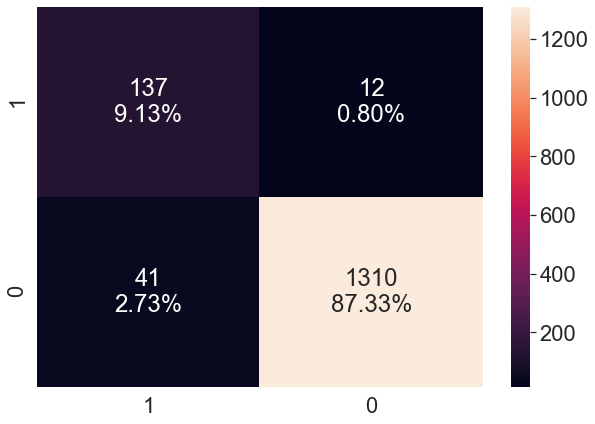

In [481]:
make_confusion_matrix(y_test, best_model3)

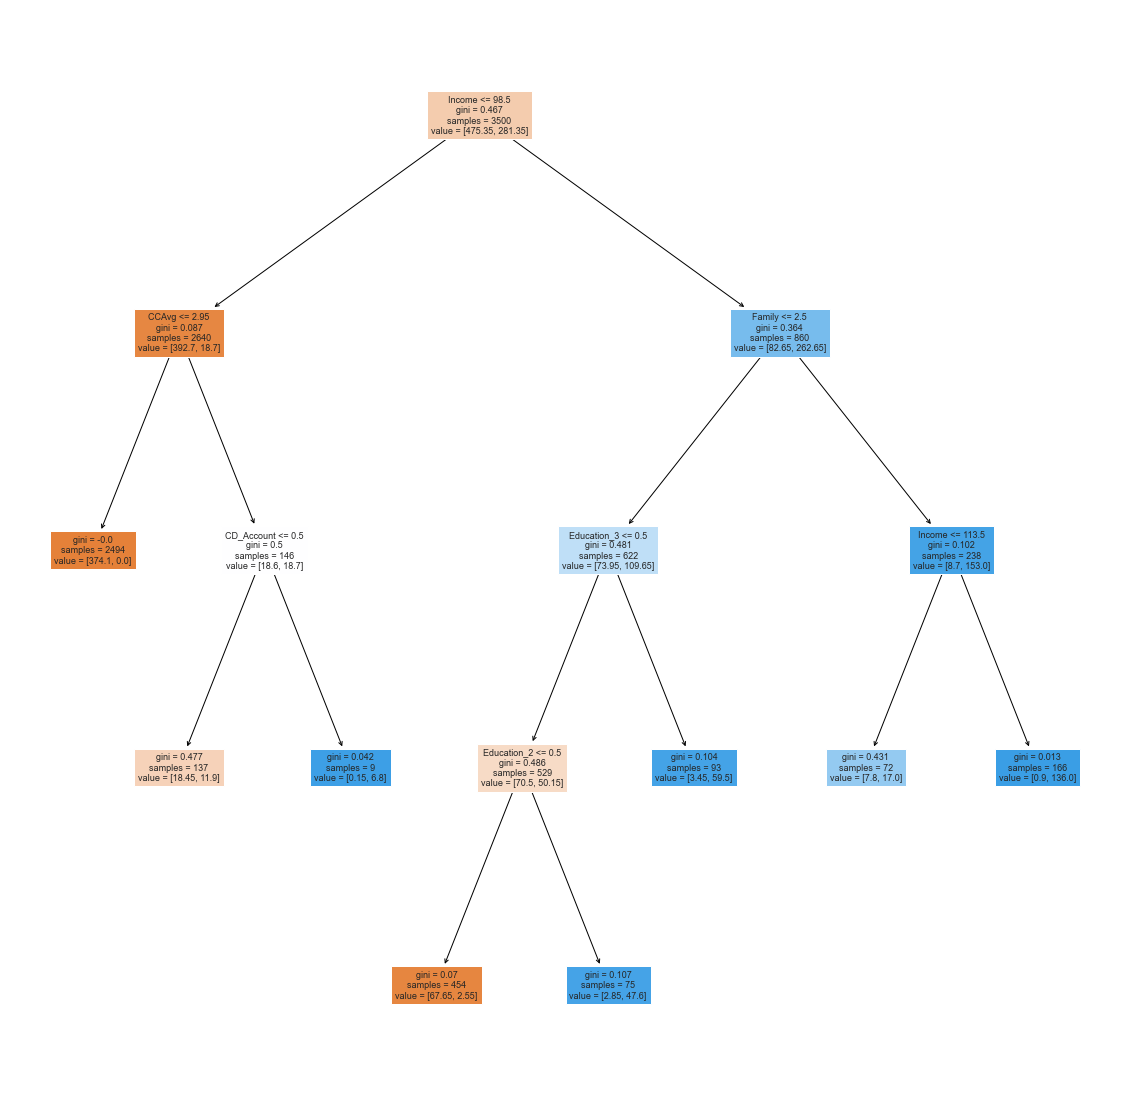

In [477]:
plt.figure(figsize=(20,20))

out = tree.plot_tree(best_model3,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [478]:
print (pd.DataFrame(best_model3.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                    Imp
Income             0.63
Education_2        0.16
Education_3        0.07
Family             0.07
CCAvg              0.06
CD_Account         0.01
Age                0.00
Experience         0.00
ZIPCode            0.00
Mortgage           0.00
Securities_Account 0.00
Online             0.00
CreditCard         0.00


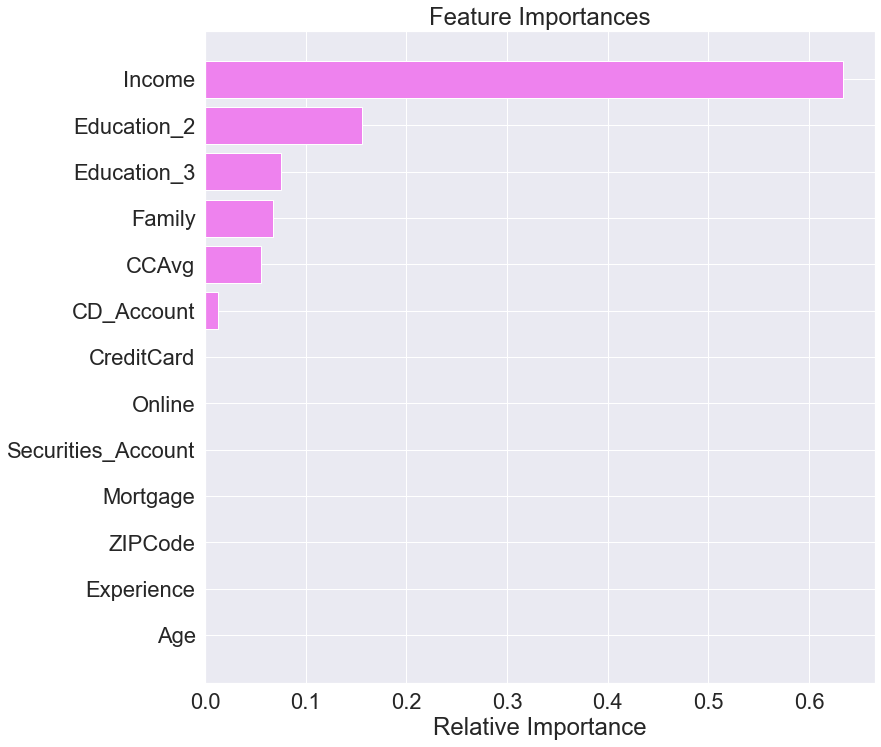

In [479]:
importances = best_model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Model3 has the same important factor list as model2, a little simpler than model2, but precision is not high enough, so model2 is still better than model3 in general

# Actionable Insights & Recommendations

###  compare the logistic regression model and Decision tree, the two models have soimilarites and diffrences

### **1, Both regression model and decision tree TP rate could increased to 8.8%, which is pretty close to the real data. BUt regression model has low precision when TP rate increased to 8.8%. Decision tree has high TP rate, also low FP anf FN rate, which is what we expected.

### 2, The important features of those two model are very similar. But Regression model conclude that the most important fratures are Education and CD_account, DEcision tree concludes that the most important factors are Income, then education and family.CD_account are important but not as family and income. If we look at the heat map, Income has a higher corrrlation with Personal_loan than family,then CD_account. So we could say decision are good at select the most important features than regression model.

### 3, The decision tree final model are very sensitive to alpha number, so it is not very stable. The regression model is more stable if we stick to one regresion algrithm

### 3, In genral, Income, education, family, CCAvg, CD_account are all important features for predicting cusotmers buying Personal_loan or not. The bank should focus the campaign on customers with high income, higher education level, larger family size and people who has a CD_account with the bank. Those customers has a much larger chance to buying personal loan. By doing this, the bank will save cost on the campaign and have a better success rate of expanding loan business.**


## Misclassification analysis


In [645]:
# re create the traianing and test data.
X = df2.drop(['Personal_Loan','ID'], axis=1)
Y = df2['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [647]:
y_train

1334    0
4768    0
65      0
177     0
4489    0
       ..
2895    0
2763    0
905     0
3980    0
235     0
Name: Personal_Loan, Length: 3500, dtype: int64

In [648]:
# find the misclassifed rows index
import numpy as np

y_train_ary = np.asarray(y_train)
mis_cls = np.where(y_train_ary != best_model2.predict(X_train))

In [649]:
mis_cls

(array([  13,   38,   60,  131,  208,  313,  368,  391,  392,  422,  459,
         620,  630,  672,  817,  853,  857,  858,  890,  892,  989, 1018,
        1030, 1064, 1117, 1213, 1229, 1290, 1377, 1404, 1436, 1451, 1466,
        1484, 1491, 1546, 1644, 1652, 1711, 1734, 1750, 1793, 1900, 1904,
        1982, 1994, 2105, 2176, 2285, 2407, 2416, 2449, 2489, 2564, 2576,
        2605, 2649, 2754, 2876, 2893, 2975, 3060, 3061, 3085, 3370, 3439],
       dtype=int64),)

In [690]:
# convert the misclassified row to dataframe
for index in mis_cls:
    print(index)
mis_df = pd.DataFrame()
for i in index:
    mis_df = mis_df.append(X.loc[[i]])

[  13   38   60  131  208  313  368  391  392  422  459  620  630  672
  817  853  857  858  890  892  989 1018 1030 1064 1117 1213 1229 1290
 1377 1404 1436 1451 1466 1484 1491 1546 1644 1652 1711 1734 1750 1793
 1900 1904 1982 1994 2105 2176 2285 2407 2416 2449 2489 2564 2576 2605
 2649 2754 2876 2893 2975 3060 3061 3085 3370 3439]


In [718]:
# convert the misclassified row to dataframe
for index in mis_cls:
    print(index)
mis_dfy = pd.DataFrame()
for i in index:
    mis_dfy = mis_dfy.append(df2.loc[[i]])

[  13   38   60  131  208  313  368  391  392  422  459  620  630  672
  817  853  857  858  890  892  989 1018 1030 1064 1117 1213 1229 1290
 1377 1404 1436 1451 1466 1484 1491 1546 1644 1652 1711 1734 1750 1793
 1900 1904 1982 1994 2105 2176 2285 2407 2416 2449 2489 2564 2576 2605
 2649 2754 2876 2893 2975 3060 3061 3085 3370 3439]


In [719]:
mis_dfy

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3
13,14,59,32,40.00,94920,4,2.50,0.00,0,0,0,1,0,1,0
38,39,42,18,141.00,94114,3,5.00,0.00,1,1,1,1,0,0,1
60,61,49,24,39.00,90404,3,1.70,0.00,0,1,0,1,0,1,0
131,132,58,34,149.00,93720,4,5.20,0.00,1,0,1,1,1,1,0
208,209,40,16,73.00,94110,4,2.67,0.00,0,0,0,1,1,0,0
313,314,34,9,41.00,93720,3,2.30,0.00,0,0,0,0,1,0,0
368,369,63,37,30.00,92054,2,1.00,159.00,0,0,0,1,0,0,1
391,392,58,32,9.00,94080,3,0.30,0.00,0,0,0,0,1,0,1
392,393,54,29,48.00,91709,4,1.80,0.00,0,0,0,1,0,0,1
422,423,46,20,145.00,91380,2,5.20,0.00,0,1,1,1,0,0,0


## the bove dataframe contains only the missclassfied rows, let's try to find some pattern

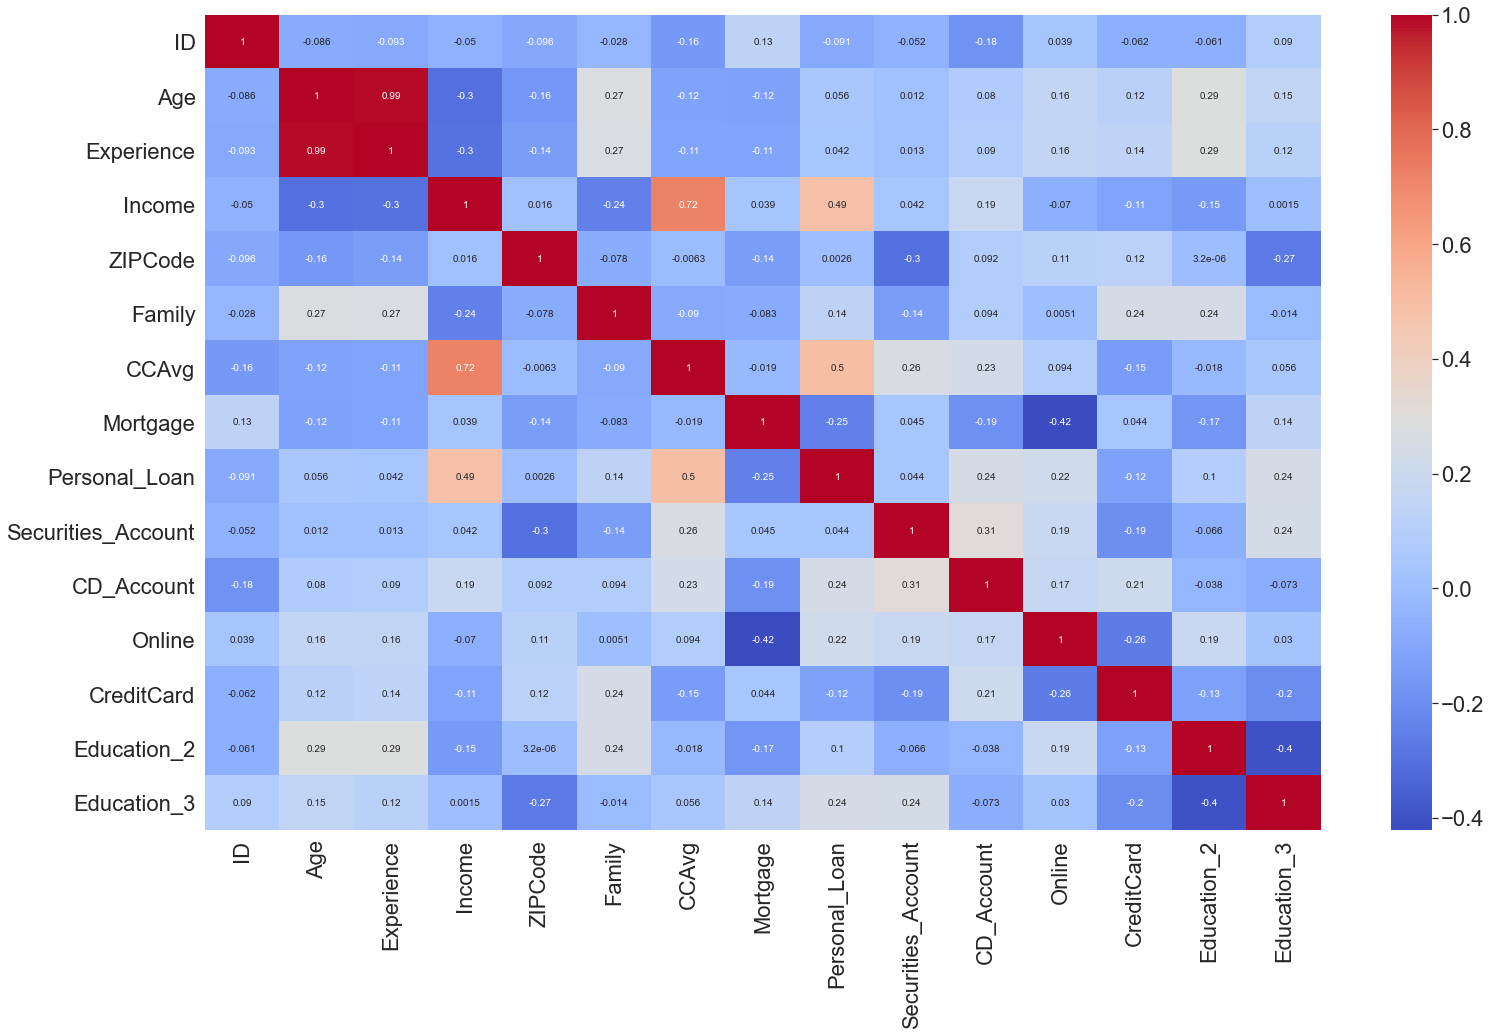

In [730]:
# plot correlation bwtween numerical columns
plt.figure(figsize=(25, 15))
sns.heatmap(mis_dfy.corr(), annot=True, cmap="coolwarm")

### not much pattern can be observed from the missclassifred data